# PROBLEM STATEMENT

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
pd.set_option("display.max.columns", None)
data = pd.read_csv('train.csv')

In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

In [5]:
print("The shape of the dataset is: ")
print("number of rows are:- ", data.shape[0])
print("Number of columns are:- ",data.shape[1])

The shape of the dataset is: 
number of rows are:-  1168
Number of columns are:-  81


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168,954.00000,1168.000000,1168,77,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168.000000,1168.000000,1168.000000,1168.000000,1168,1168,1168,1168,1161,1161.000000,1168,1168,1168,1138,1138,1137,1138,1168.000000,1137,1168.000000,1168.000000,1168.000000,1168,1168,1168,1168,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168,1168.000000,1168,1168.000000,617,1104,1104.000000,1104,1168.000000,1168.000000,1104,1104,1168,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,7,237,44,1168.000000,1168.000000,1168.000000,1168,1168,1168.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,14,15,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,CBlock,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,928,NaN,NaN,1164,41,740,1046,1168,842,1105,182,1005,1154,981,578,NaN,NaN,NaN,NaN,915,1144,396,387,696,NaN,717,1022,516,517,1041,756,345,NaN,1002,NaN,NaN,NaN,1143,585,1090,1070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578,NaN,1085,NaN,301,691,NaN,487,NaN,NaN,1050,1061,1071,NaN,NaN,NaN,NaN,NaN,NaN,3,129,40,NaN,NaN,NaN,999,945,NaN
mean,724.136130,56.767979,NaN,70.98847,10484.749144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.104452,5.595890,1970.930651,1984.758562,NaN,NaN,NaN,NaN,NaN,102.310078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444.726027,NaN,46.647260,569.721747,1061.095034,NaN,NaN,NaN,NaN,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,NaN,6.542808,NaN,0.617295,NaN,NaN,1978.193841,NaN,1.776541,476.860445,NaN,NaN,NaN,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,NaN,NaN,NaN,47.315068,6.344178,2007.804795,NaN,NaN,181477.005993
std,416.159877,41.940650,NaN,24.82875,8957.442311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.390153,1.124343,30.145255,20.785185,NaN,NaN,NaN,NaN,NaN,182.595606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462.664785,NaN,163.520016,449.375525,442.272249,NaN,NaN,NaN,NaN,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,NaN,1.598484,NaN,0.650575,NaN,NaN,24.890704,NaN,0.745554,214.466769,NaN,NaN,NaN,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,NaN,NaN,NaN,543.264432,2.686352,1.329738,NaN,NaN,79105.586863
min,1.000000,20.000000,NaN,21.00000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1875.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,

In [8]:
numerical_data = data.select_dtypes(include=[np.number])
numerical_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1970.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1997.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1977.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1977.0,2,529,240,0,0,0,0,0,0,6,2009,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,NaN,9819,5,5,1967,1967,31.0,450,0,432,882,900,0,0,900,0,0,1,0,3,1,5,0,1970.0,1,280,0,0,0,0,0,0,0,2,2010,122000
1164,554,20,67.0,8777,4,5,1949,2003,0.0,0,0,0,0,1126,0,0,1126,0,0,2,0,2,1,5,0,2002.0,2,520,0,96,0,0,0,0,0,5,2009,108000
1165,196,160,24.0,2280,6,6,1976,1976,0.0,566,0,289,855,855,601,0,1456,0,0,2,1,3,1,7,1,1976.0,2,440,87,0,0,0,0,0,0,7,2009,148500
1166,31,70,50.0,8500,4,4,1920,1950,0.0,0,0,649,649,649,668,0,1317,0,0,1,0,3,1,6,0,1920.0,1,250,0,54,172,0,0,0,0,7,2008,40000


In [9]:
categorical_data = data.select_dtypes(include='object')
categorical_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,Gd,Gd,PConc,TA,Gd,Gd,ALQ,Rec,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,COD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,Gd,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1164,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,NaN,NaN,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Detchd,Fin,TA,TA,N,NaN,MnPrv,NaN,WD,Normal
1165,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,Gable,CompShg,Plywood,Brk Cmn,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1166,C (all),Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,Gambrel,CompShg,BrkFace,BrkFace,None,TA,Fa,BrkTil,TA,TA,No,Unf,Unf,GasA,TA,N,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,Fa,N,NaN,MnPrv,NaN,WD,Normal


In [10]:
col = data.columns
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
null_col_float = []
null_col_obj = []
for i in col:
    if data[i].isnull().sum() != 0:
        print("Columns name is:",i,"Null Values in the columns are:", data[i].isnull().sum(),"Columns type is:",data[i].dtypes)
        if data[i].dtypes == 'object':
            null_col_obj.append(i)
        else:
            null_col_float.append(i)
            
print('\n')
print("Total null values are:-",data.isnull().sum().sum())

Columns name is: LotFrontage Null Values in the columns are: 214 Columns type is: float64
Columns name is: Alley Null Values in the columns are: 1091 Columns type is: object
Columns name is: MasVnrType Null Values in the columns are: 7 Columns type is: object
Columns name is: MasVnrArea Null Values in the columns are: 7 Columns type is: float64
Columns name is: BsmtQual Null Values in the columns are: 30 Columns type is: object
Columns name is: BsmtCond Null Values in the columns are: 30 Columns type is: object
Columns name is: BsmtExposure Null Values in the columns are: 31 Columns type is: object
Columns name is: BsmtFinType1 Null Values in the columns are: 30 Columns type is: object
Columns name is: BsmtFinType2 Null Values in the columns are: 31 Columns type is: object
Columns name is: FireplaceQu Null Values in the columns are: 551 Columns type is: object
Columns name is: GarageType Null Values in the columns are: 64 Columns type is: object
Columns name is: GarageYrBlt Null Values

In [12]:
null_col_float

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

<Figure size 864x648 with 0 Axes>

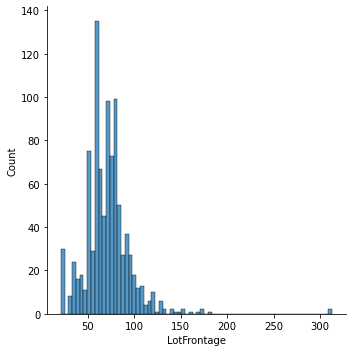

In [13]:
plt.figure(figsize=(12,9))
sns.displot(data=data, x="LotFrontage",)
plt.show()

In [14]:
data['LotFrontage'].skew()

2.4502410142609246

Skewness of LotFrontage is 2.4502410142609246
Data Not normally distributed and hence will use median
Skewness of MasVnrArea is 2.8261726776978673
Data Not normally distributed and hence will use median
Skewness of GarageYrBlt is -0.6445640197769343
Data Not normally distributed and hence will use median


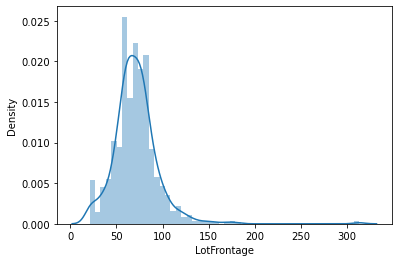

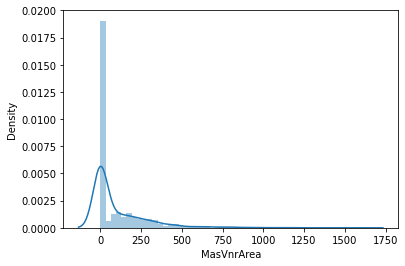

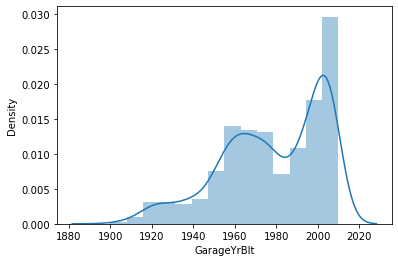

In [15]:
for i in null_col_float:
    plt.figure()
    sns.distplot(data[i])
    plt.show
    print("===================")
    print("Skewness of",i,"is",data[i].skew())
    if data[i].skew() > 0.50 or data[i].skew() < -0.50:
        print("Data Not normally distributed and hence will use median")
    else:
        print("Will use mean")

In [16]:
for i in null_col_float:
    data[i] = data[i].fillna(data[i].median())

In [17]:
for i in null_col_obj:
    data[i] = data[i].fillna(data[i].mode()[0])

In [18]:
for i in null_col_float:
    print("Null Values in",i,"is", data[i].isnull().sum())

Null Values in LotFrontage is 0
Null Values in MasVnrArea is 0
Null Values in GarageYrBlt is 0


In [19]:
for i in null_col_obj:
    print("Null Values in",i,"is", data[i].isnull().sum())

Null Values in Alley is 0
Null Values in MasVnrType is 0
Null Values in BsmtQual is 0
Null Values in BsmtCond is 0
Null Values in BsmtExposure is 0
Null Values in BsmtFinType1 is 0
Null Values in BsmtFinType2 is 0
Null Values in FireplaceQu is 0
Null Values in GarageType is 0
Null Values in GarageFinish is 0
Null Values in GarageQual is 0
Null Values in GarageCond is 0
Null Values in PoolQC is 0
Null Values in Fence is 0
Null Values in MiscFeature is 0


We have successfully removed the Null values from the dataset. 

In [20]:
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

Id : [127 889 793 ... 196  31 617]
MSSubClass : [120  20  60  50  70  30 160  85  45  90  40  80 190  75 180]
MSZoning : ['RL' 'RM' 'FV' 'RH' 'C (all)']
LotFrontage : [ 70.  95.  92. 105.  58.  88.  80.  50.  44. 129.  59.  55.  64.  24.
  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.  75.
 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.  78.
  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.  53.
 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46. 101. 112.
 149.  93.  49.  43. 130.  54.  91.  67.  97. 110. 103. 115.  94.  48.
  36. 313. 109. 144. 121. 102. 116. 182.  32.  42. 168. 118.  38. 140.
 134. 114. 124.  39. 111.  45. 106. 153.]
LotArea : [  4928  15865   9920  11751  16635  14054  11341  13125   9170   8480
   8600   9548   9196   8892  16466  10592   5890   7314   7917   2016
  12435   8445   9717  10659   9230  21000  25339  11394   6380  11988
   7658   3378  18890  12358  14762  10356  10400  12615   7540   9100


In [21]:
col = data.columns

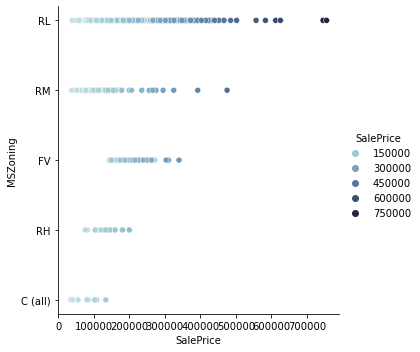

In [22]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="MSZoning",
    hue="SalePrice", palette=cmap, sizes=(10, 200),
)

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
       
From the above Graph we can check that RL Zoning: Residential Low Density is having the most expensive houses in this range and commercial least expensive. 

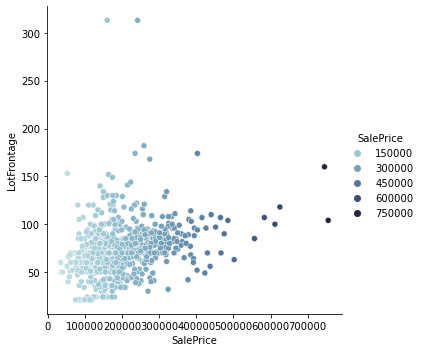

In [23]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="LotFrontage",
    hue="SalePrice", palette=cmap, sizes=(10, 200),
)

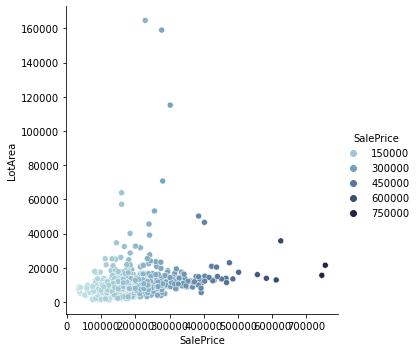

In [24]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="LotArea",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

In [25]:
col

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

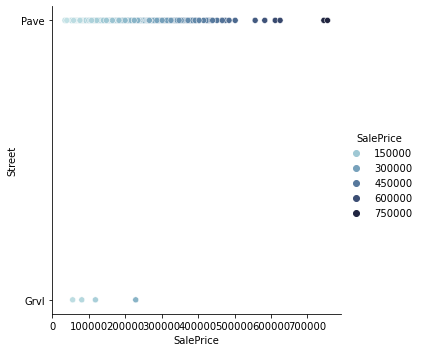

In [26]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="Street",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

We can see that pavel road access is more in demand as th prices increases in paved roads compared to gravel. 

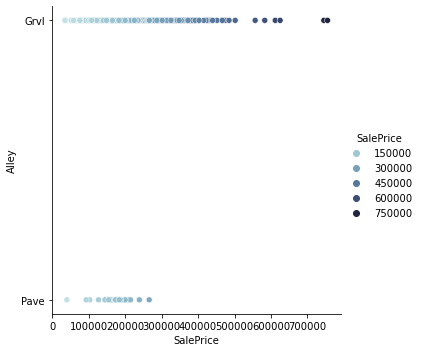

In [27]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="Alley",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

We can see that Gravel alley access to property is more in demand as th prices increases in paved roads compared to gravel. 

In [28]:
data['Utilities'].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

<AxesSubplot:xlabel='Utilities', ylabel='count'>

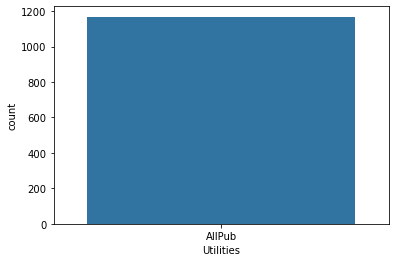

In [29]:
sns.countplot(data['Utilities'])

In [30]:
col

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

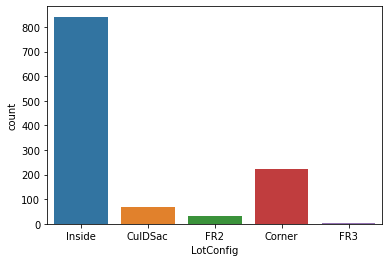

In [31]:
sns.countplot(data['LotConfig'])

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

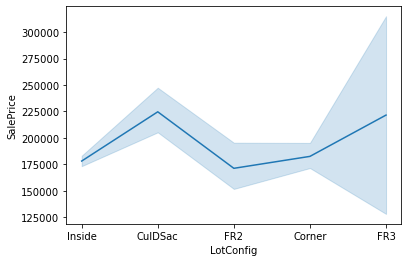

In [32]:
sns.lineplot(data=data, x = 'LotConfig', y='SalePrice')

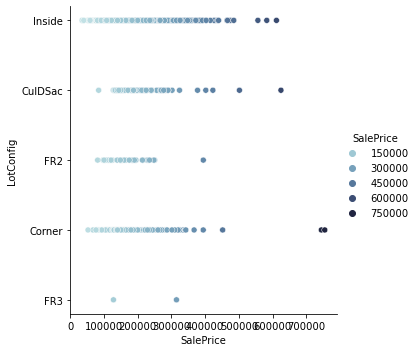

In [33]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="LotConfig",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

We can say that corner lot leads to a high price. 

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

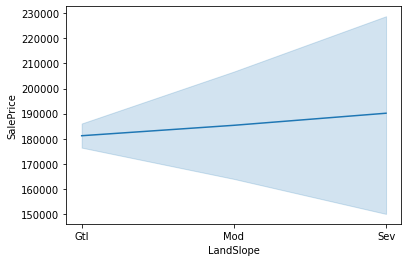

In [34]:
sns.lineplot(data=data, x = 'LandSlope', y='SalePrice')

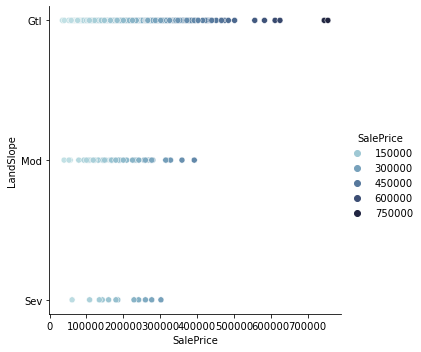

In [35]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="LandSlope",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

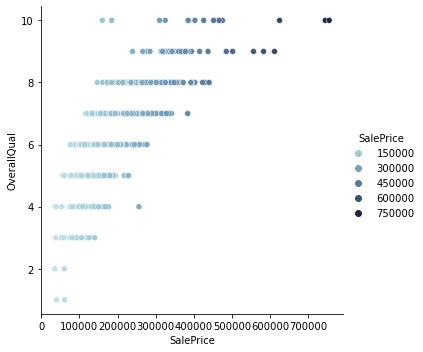

In [36]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="OverallQual",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

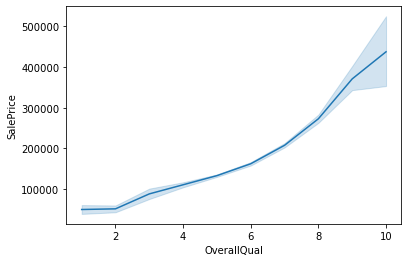

In [37]:
sns.lineplot(data=data, x = 'OverallQual', y='SalePrice')

We can see that higher the rating of the overall material and finish of the house higher the prices. 

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

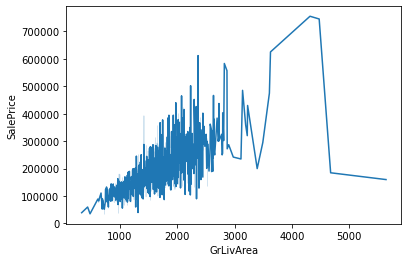

In [38]:
sns.lineplot(data=data, x = 'GrLivArea', y='SalePrice')

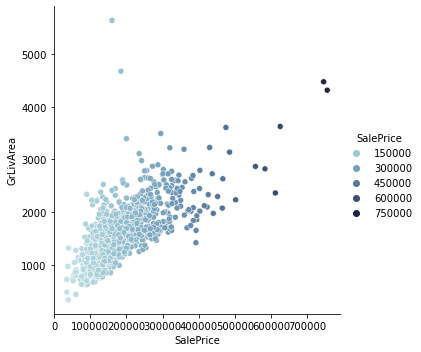

In [39]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="GrLivArea",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

From the above graph we can say that Above grade (ground) living area square feet is directly related to prices. 

In [40]:
col

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

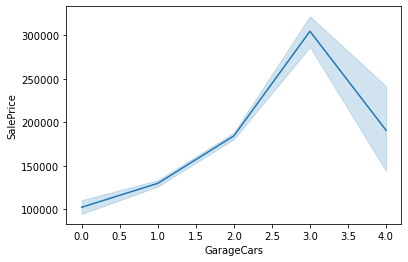

In [41]:
sns.lineplot(data=data, x = 'GarageCars', y='SalePrice')

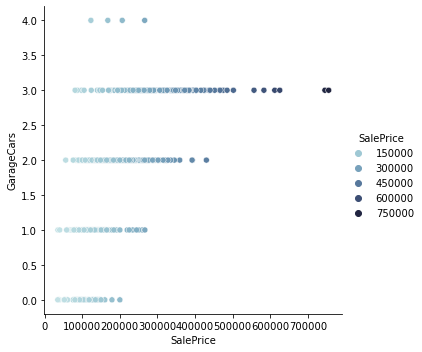

In [42]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="GarageCars",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

Here we can say that garage Size having car capacity upto 3 are are highly related to sale price. 

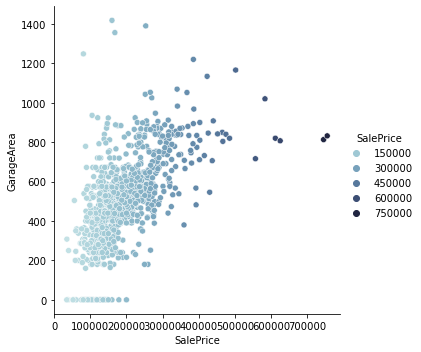

In [43]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="GarageArea",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

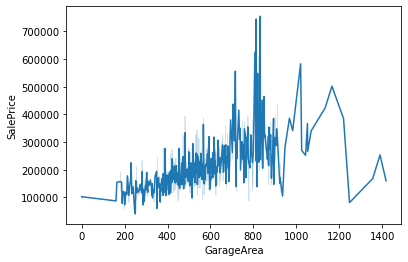

In [44]:
sns.lineplot(data=data, x = 'GarageArea', y='SalePrice')

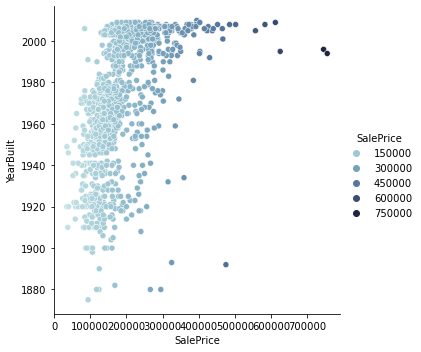

In [45]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="YearBuilt",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

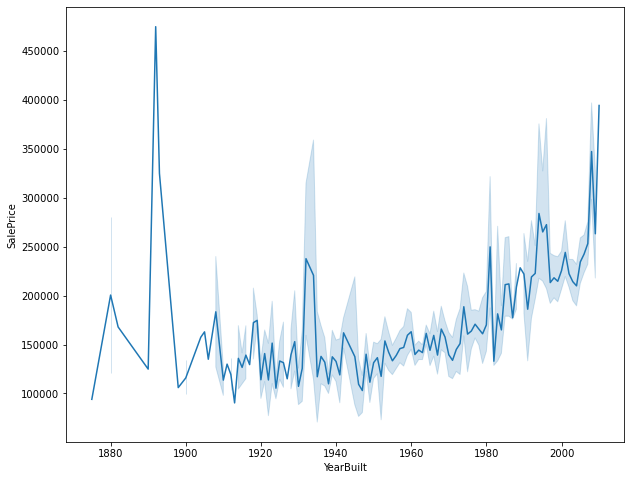

In [46]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data, x = 'YearBuilt', y='SalePrice')
plt.show()

Old is not gold here, the more the recent the houses are made more is the sale price.

In [47]:
col

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

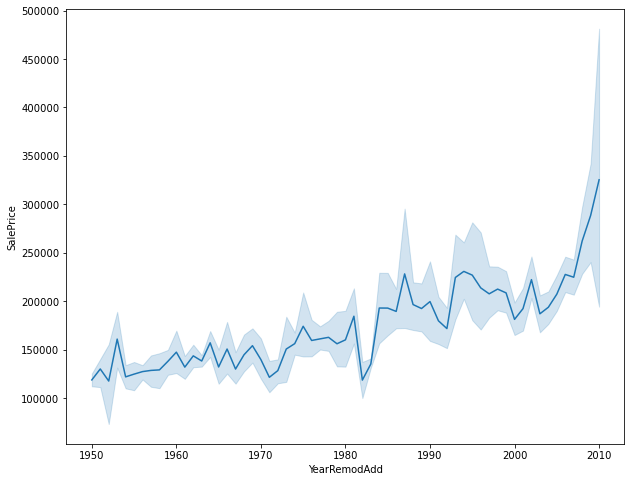

In [48]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data, x = 'YearRemodAdd', y='SalePrice')
plt.show()

We can say that Remodel date is directly related with the sales price as the price is increasing. 

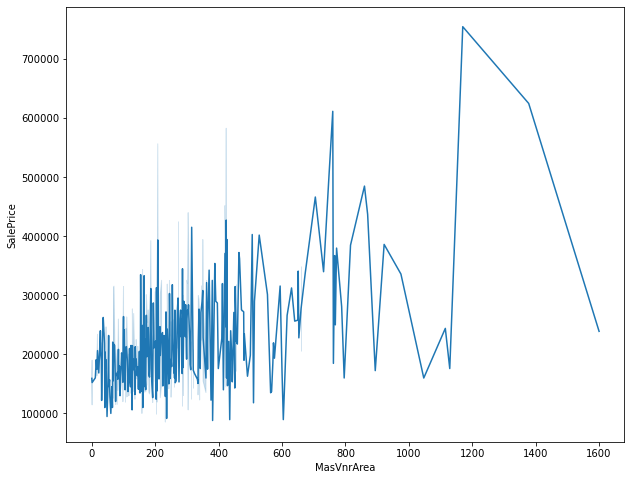

In [49]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data, x = 'MasVnrArea', y='SalePrice')
plt.show()

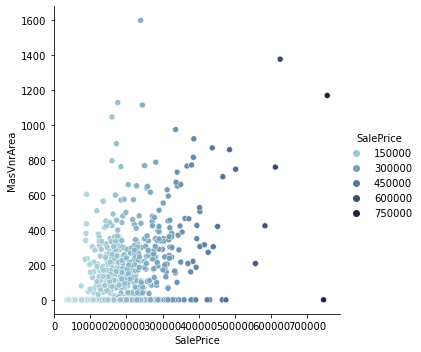

In [50]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="MasVnrArea",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

Here Masonry veneer area in square feet is too making an impact on the sales price. 

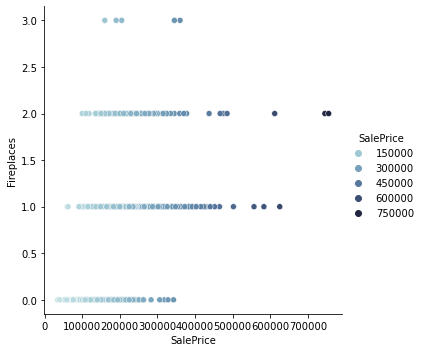

In [51]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="Fireplaces",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

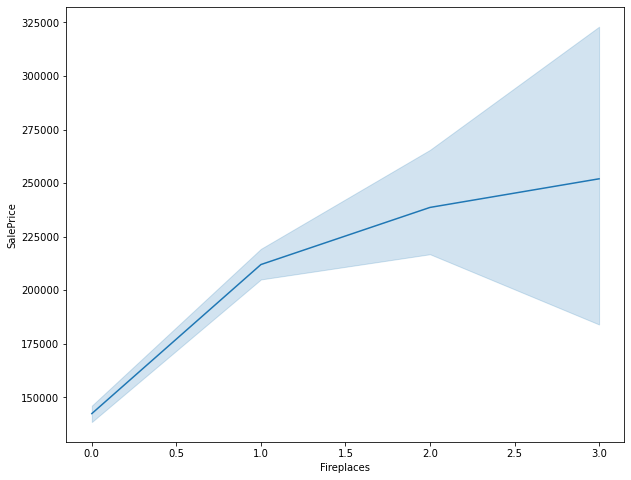

In [52]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data, x = 'Fireplaces', y='SalePrice')
plt.show()

Fireplaces too seems an importatnt aspect. 

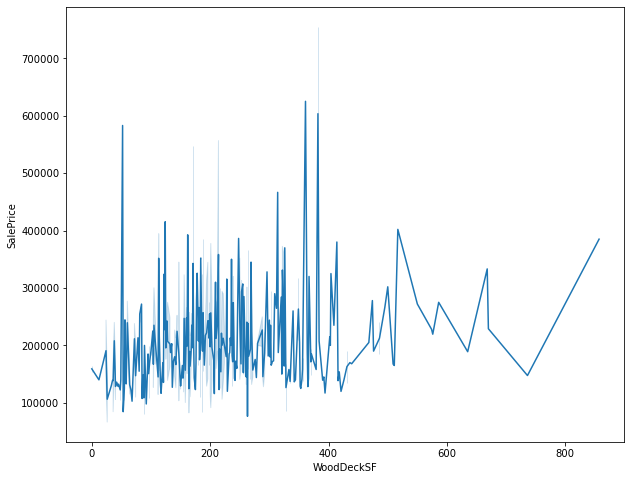

In [53]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data, x = 'WoodDeckSF', y='SalePrice')
plt.show()

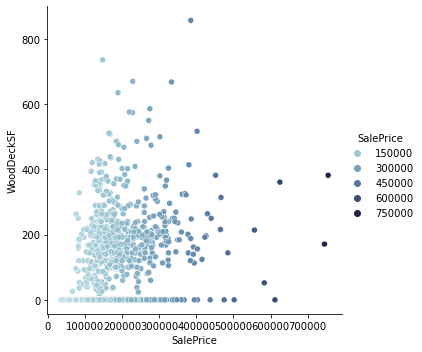

In [54]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="WoodDeckSF",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

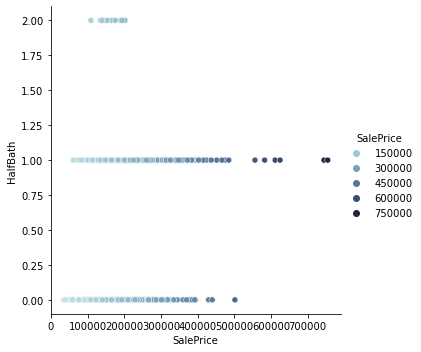

In [55]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="HalfBath",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

<AxesSubplot:xlabel='HalfBath', ylabel='count'>

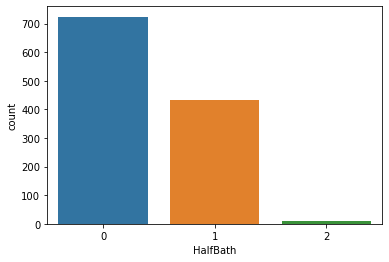

In [56]:
sns.countplot(data['HalfBath'])

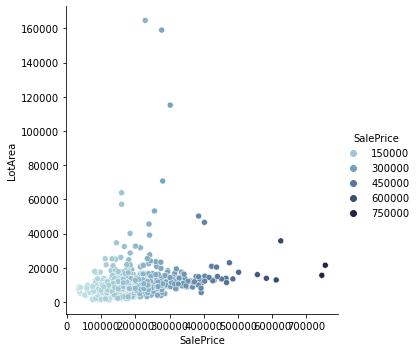

In [57]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="LotArea",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

In [58]:
categorical_data.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,Gd,Gd,PConc,TA,Gd,Gd,ALQ,Rec,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,COD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial
6,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Mod,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,BrkCmn,TA,TA,CBlock,TA,TA,No,Rec,BLQ,GasA,Ex,Y,SBrkr,TA,Maj1,TA,Attchd,RFn,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
8,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,ALQ,GLQ,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,Fa,Fa,Y,NaN,GdPrv,Shed,WD,Normal
9,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,COD,Abnorml


In [59]:
cat_col = categorical_data.columns
for i in cat_col:
    print(i)
    print(data[i].value_counts())
    print("\n")

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley
Grvl    1132
Pave      36
Name: Alley, dtype: int64


LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities
AllPub    1168
Name: Utilities, dtype: int64


LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
Meado

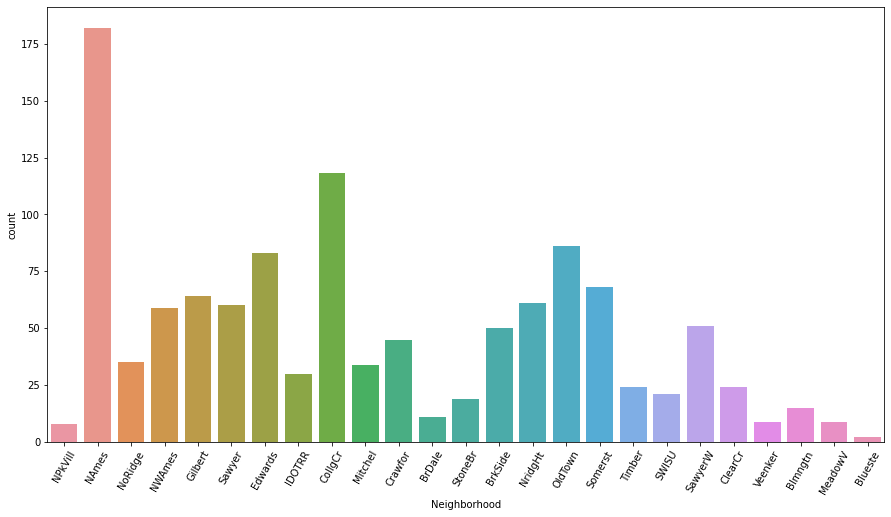

In [60]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=60)
sns.countplot(data['Neighborhood'])
plt.show()

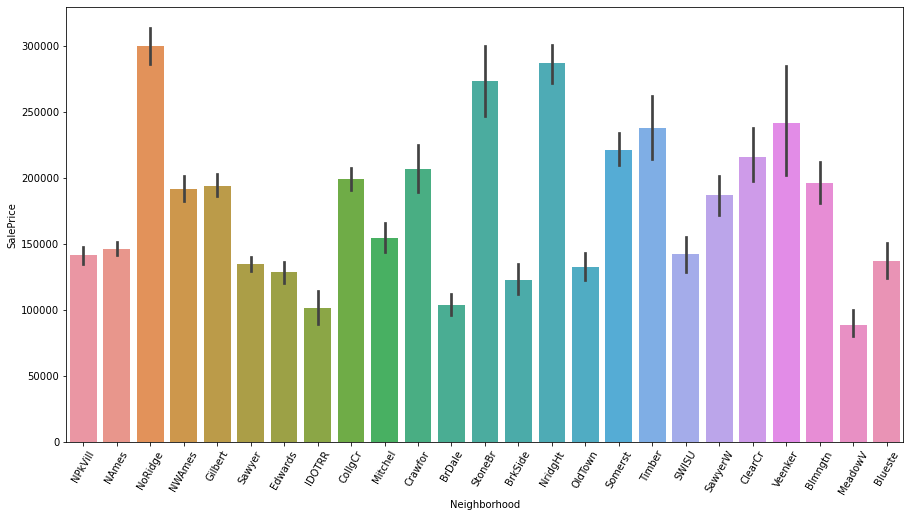

In [88]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=60)
sns.barplot(x="Neighborhood",y='SalePrice',data=data)
plt.show()

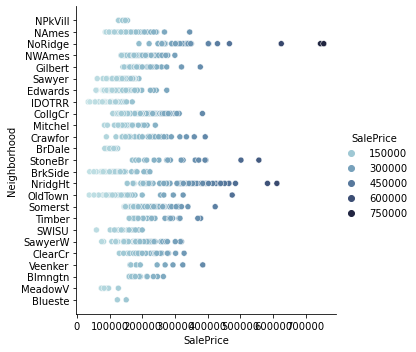

In [61]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="Neighborhood",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

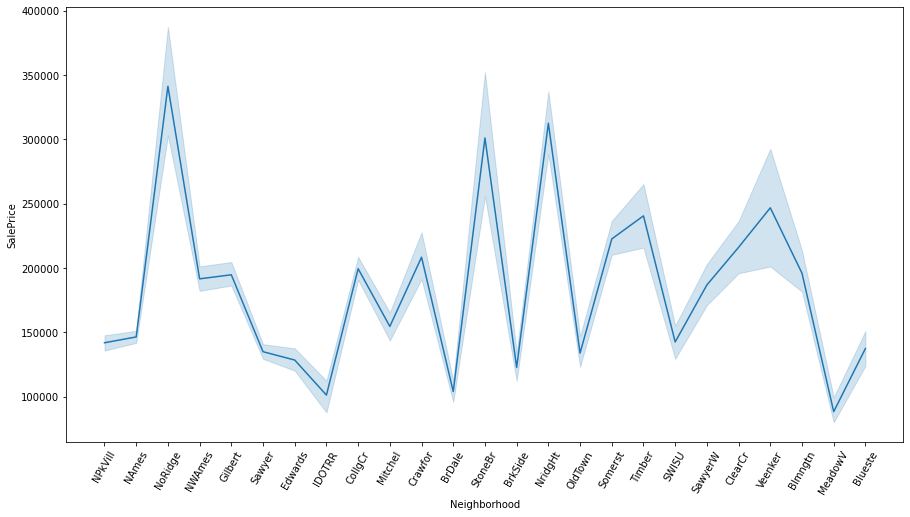

In [62]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=60)
sns.lineplot(data=data, x = 'Neighborhood', y='SalePrice')
plt.show()

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

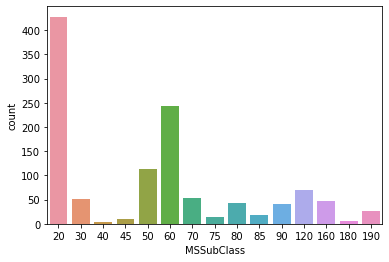

In [63]:
sns.countplot(data['MSSubClass'])

We have mostly the 1-STORY 1946 & NEWER ALL STYLES

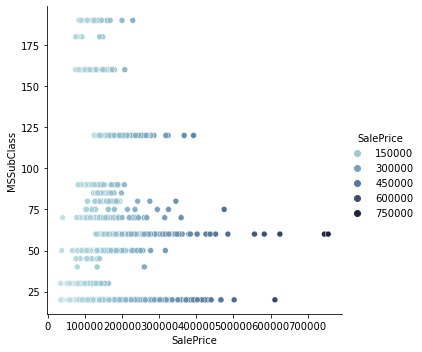

In [64]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="MSSubClass",
    hue="SalePrice", palette=cmap, sizes=(50, 250),
)

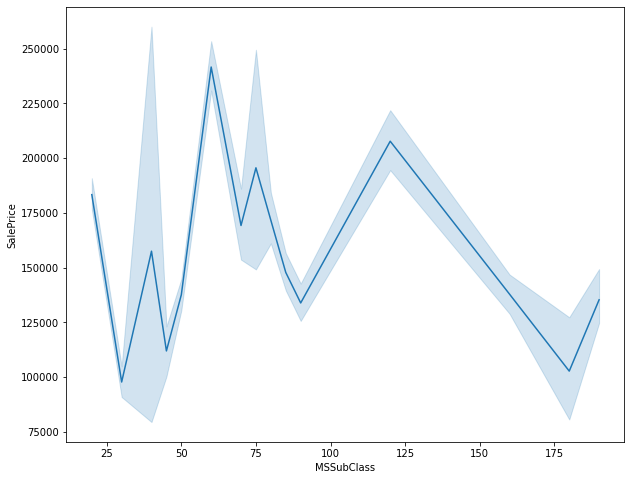

In [65]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data, x = 'MSSubClass', y='SalePrice')
plt.show()

We can see that we have maximum prices for dwellig type 60 and 120 that is: 2-STORY 1946 & NEWER and 1-STORY PUD (Planned Unit Development) - 1946 & NEWER

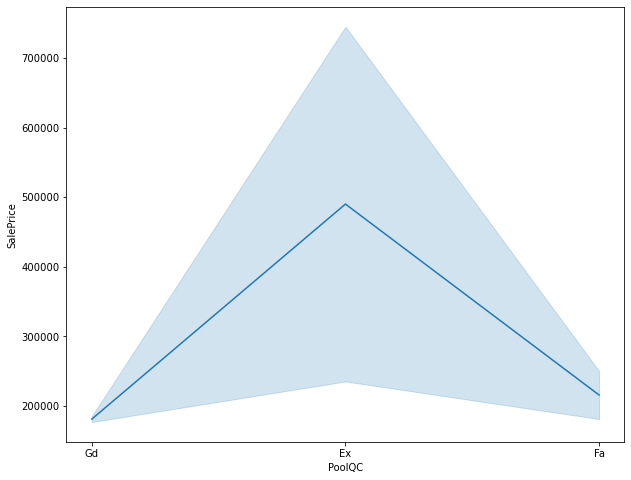

In [66]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data, x = 'PoolQC', y='SalePrice')
plt.show()

In [67]:
col

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [68]:
col_with_zero_val = ["EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

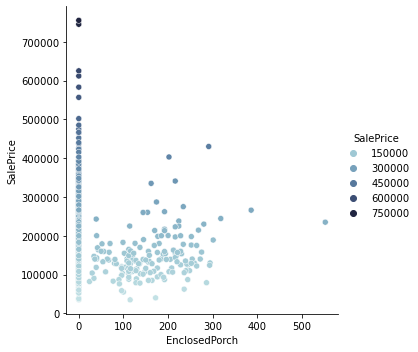

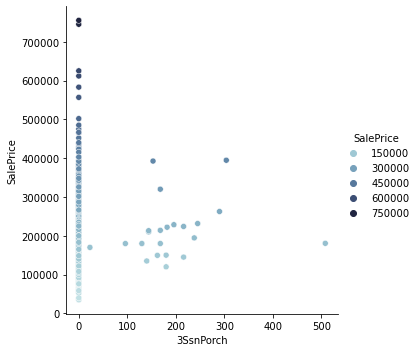

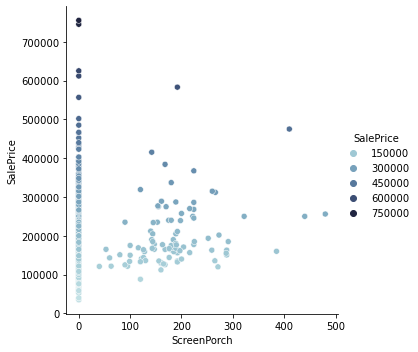

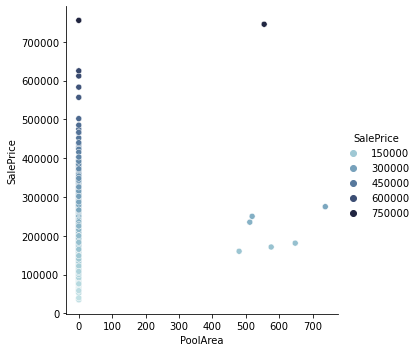

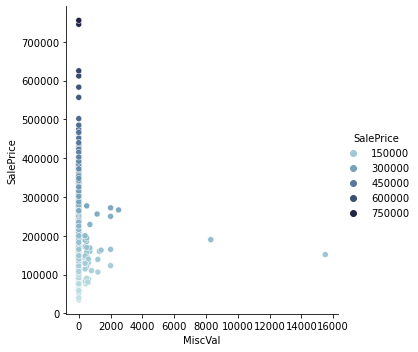

In [69]:
for i in col_with_zero_val:
    cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
    g = sns.relplot(
        data=data,
        x=data[i], y="SalePrice",
        hue="SalePrice", palette=cmap, sizes=(50, 250),
    )

<AxesSubplot:title={'center':'Relation Betwee Sales Price and Sale conditon'}, xlabel='SalePrice', ylabel='SaleCondition'>

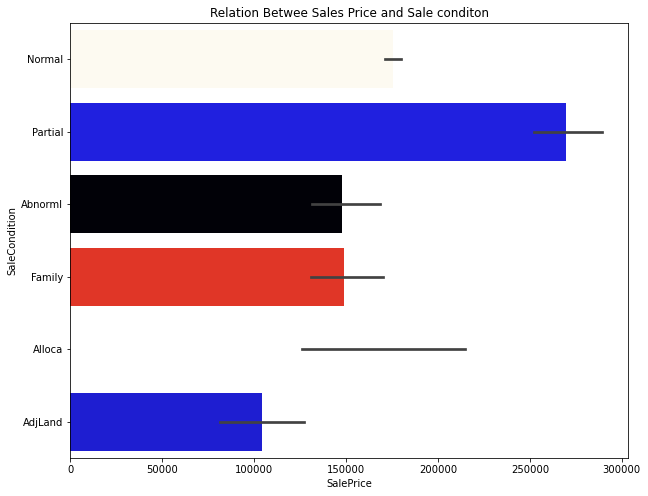

In [70]:
plt.figure(figsize=(10,8))
plt.title("Relation Betwee Sales Price and Sale conditon")
sns.barplot(y='SaleCondition',x='SalePrice',data=data,palette='flag')

<AxesSubplot:ylabel='Frequency'>

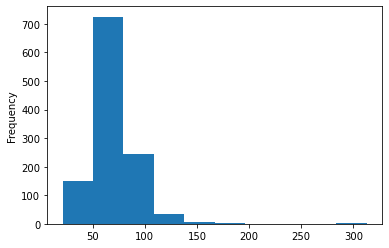

In [71]:
data['LotFrontage'].plot(kind='hist')

In [72]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

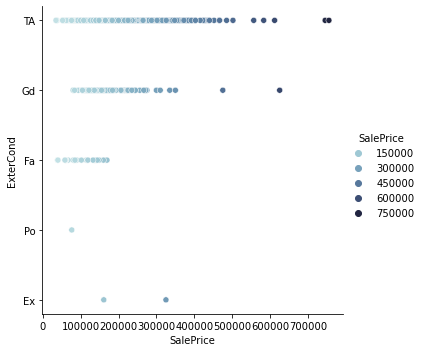

In [73]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SalePrice", y="ExterCond",
    hue="SalePrice", palette=cmap, sizes=(10, 200),
)

ExterCond: Evaluates the present condition of the material on the exterior. We can say that most of the house are Average/Typical. 

In [74]:
data.shape

(1168, 81)

Id                  AxesSubplot(0.125,0.772143;0.0945122x0.107857)
MSSubClass       AxesSubplot(0.238415,0.772143;0.0945122x0.107857)
LotFrontage      AxesSubplot(0.351829,0.772143;0.0945122x0.107857)
LotArea          AxesSubplot(0.465244,0.772143;0.0945122x0.107857)
OverallQual      AxesSubplot(0.578659,0.772143;0.0945122x0.107857)
OverallCond      AxesSubplot(0.692073,0.772143;0.0945122x0.107857)
YearBuilt        AxesSubplot(0.805488,0.772143;0.0945122x0.107857)
YearRemodAdd        AxesSubplot(0.125,0.642714;0.0945122x0.107857)
MasVnrArea       AxesSubplot(0.238415,0.642714;0.0945122x0.107857)
BsmtFinSF1       AxesSubplot(0.351829,0.642714;0.0945122x0.107857)
BsmtFinSF2       AxesSubplot(0.465244,0.642714;0.0945122x0.107857)
BsmtUnfSF        AxesSubplot(0.578659,0.642714;0.0945122x0.107857)
TotalBsmtSF      AxesSubplot(0.692073,0.642714;0.0945122x0.107857)
1stFlrSF         AxesSubplot(0.805488,0.642714;0.0945122x0.107857)
2ndFlrSF            AxesSubplot(0.125,0.513286;0.0945122x0.107

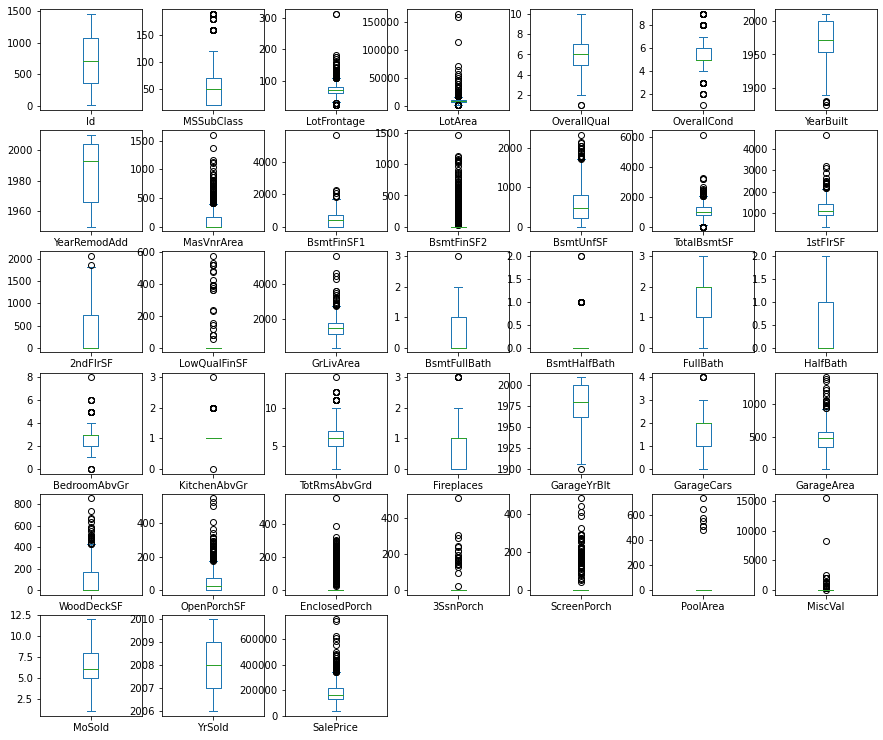

In [75]:
data.plot(kind='box',subplots=True, layout=(6,7), figsize = (15,13))

In [76]:
num_col = numerical_data.columns

In [77]:
for i in num_col:
        Q1 = data[i].quantile(.25)
        Q3 = data[i].quantile(.75)
        iqr = Q3 - Q1
        high_range = Q3 + (1.5*iqr)  
        low_range = Q1 - (1.5*iqr)
        
        (data[data[i] > high_range]) 
        (data[data[i] < low_range])

        data[i] = np.where(data[i] > high_range , high_range, np.where(data[i] < low_range, low_range,data[i]))    

Id                  AxesSubplot(0.125,0.772143;0.0945122x0.107857)
MSSubClass       AxesSubplot(0.238415,0.772143;0.0945122x0.107857)
LotFrontage      AxesSubplot(0.351829,0.772143;0.0945122x0.107857)
LotArea          AxesSubplot(0.465244,0.772143;0.0945122x0.107857)
OverallQual      AxesSubplot(0.578659,0.772143;0.0945122x0.107857)
OverallCond      AxesSubplot(0.692073,0.772143;0.0945122x0.107857)
YearBuilt        AxesSubplot(0.805488,0.772143;0.0945122x0.107857)
YearRemodAdd        AxesSubplot(0.125,0.642714;0.0945122x0.107857)
MasVnrArea       AxesSubplot(0.238415,0.642714;0.0945122x0.107857)
BsmtFinSF1       AxesSubplot(0.351829,0.642714;0.0945122x0.107857)
BsmtFinSF2       AxesSubplot(0.465244,0.642714;0.0945122x0.107857)
BsmtUnfSF        AxesSubplot(0.578659,0.642714;0.0945122x0.107857)
TotalBsmtSF      AxesSubplot(0.692073,0.642714;0.0945122x0.107857)
1stFlrSF         AxesSubplot(0.805488,0.642714;0.0945122x0.107857)
2ndFlrSF            AxesSubplot(0.125,0.513286;0.0945122x0.107

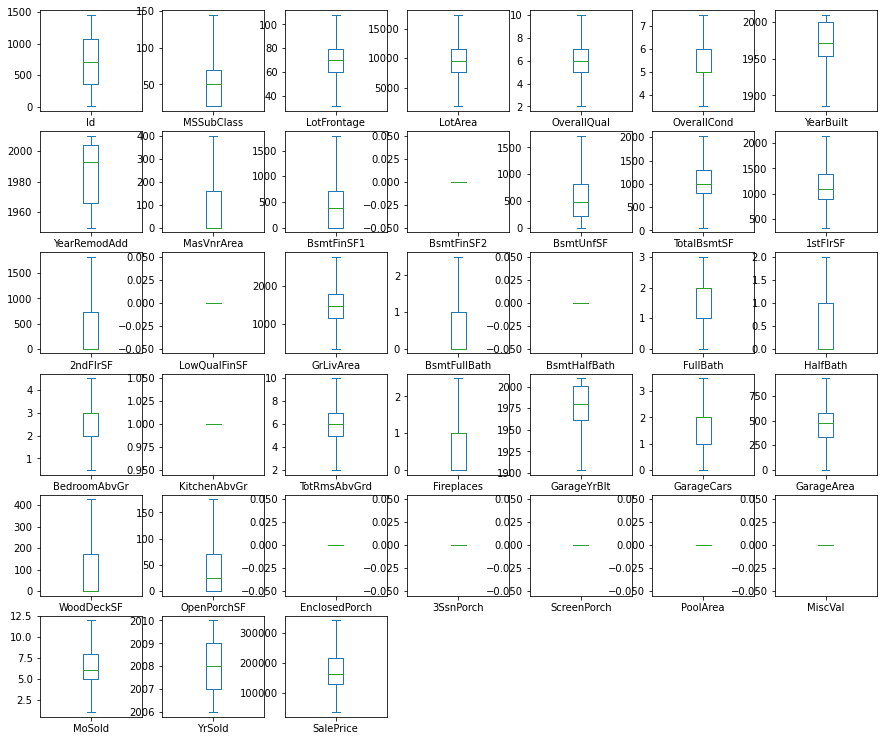

In [78]:
data.plot(kind='box',subplots=True, layout=(6,7), figsize = (15,13))

We have suceessfully removed the outliers from the columns. 

In [79]:
num_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Id
0.026526032012241022
No skewness is present


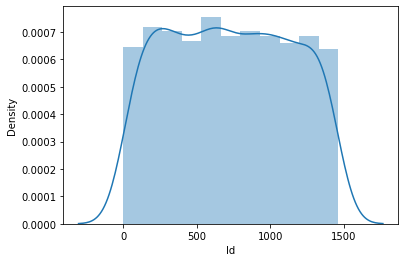

MSSubClass
1.016093732767726
Column is having skewness


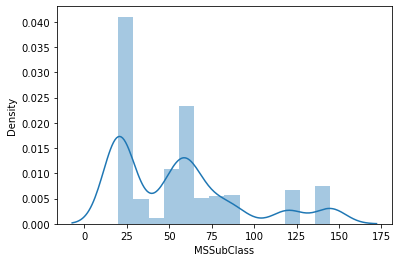

LotFrontage
0.07030953114522438
No skewness is present


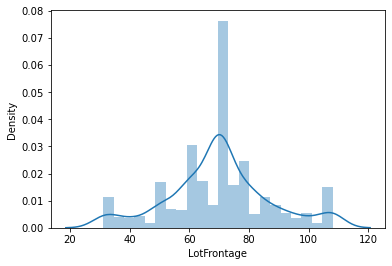

LotArea
0.1841944957358552
No skewness is present


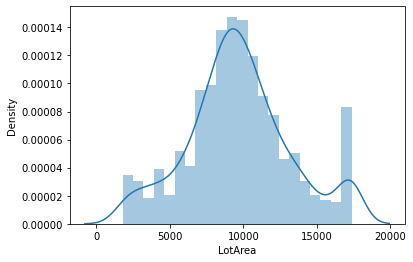

OverallQual
0.21484144483471357
No skewness is present


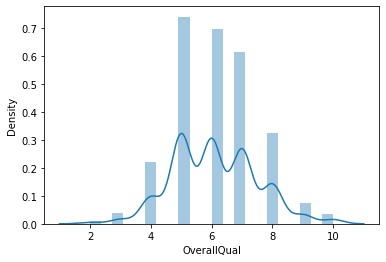

OverallCond
0.5198945390961622
No skewness is present


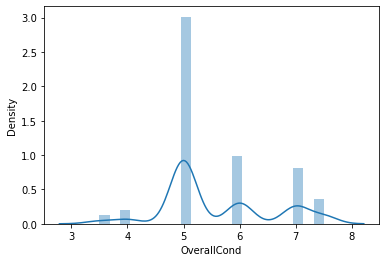

YearBuilt
-0.5620313541937273
Column is having skewness


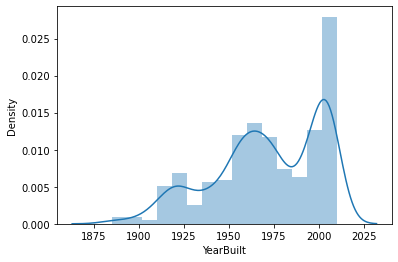

YearRemodAdd
-0.49586353822203716
No skewness is present


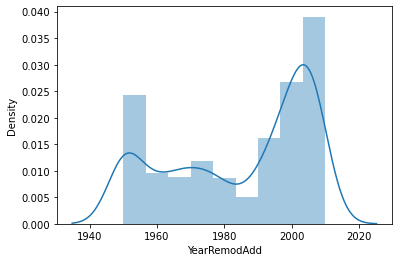

MasVnrArea
1.2949840944293136
Column is having skewness


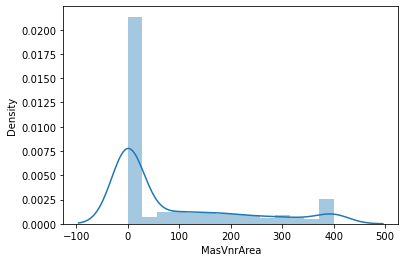

BsmtFinSF1
0.7422259849119494
Column is having skewness


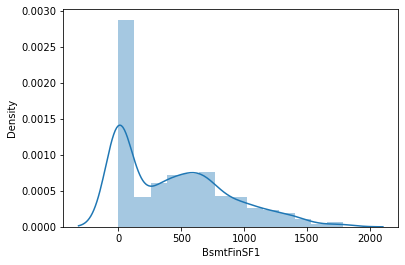

BsmtFinSF2
0
No skewness is present


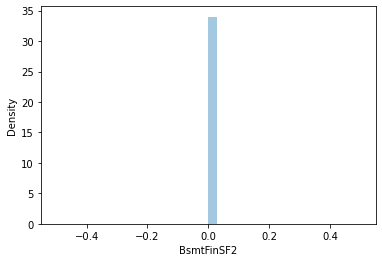

BsmtUnfSF
0.7892275350431626
Column is having skewness


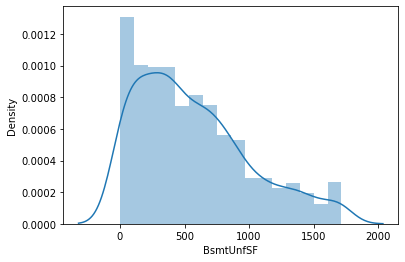

TotalBsmtSF
0.2436711023632326
No skewness is present


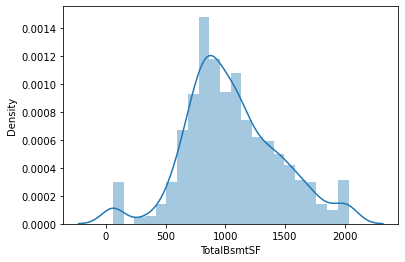

1stFlrSF
0.6637098692465284
Column is having skewness


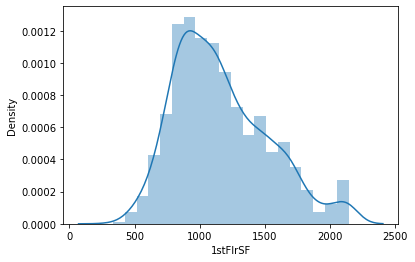

2ndFlrSF
0.8080384371112691
Column is having skewness


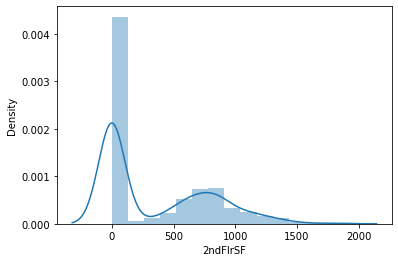

LowQualFinSF
0
No skewness is present


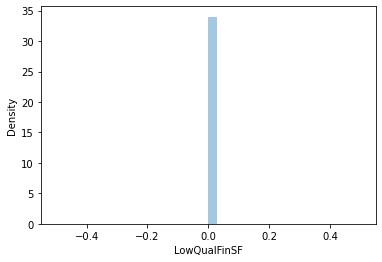

GrLivArea
0.5876505190987279
Column is having skewness


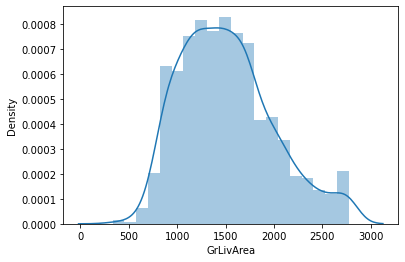

BsmtFullBath
0.5867779038782983
Column is having skewness


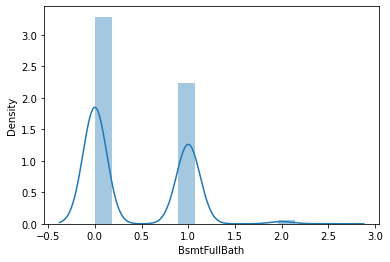

BsmtHalfBath
0
No skewness is present


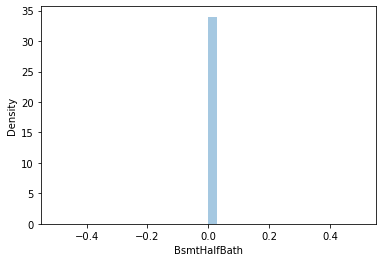

FullBath
0.05780870861471475
No skewness is present


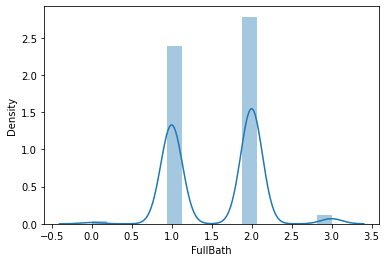

HalfBath
0.6564917514090118
Column is having skewness


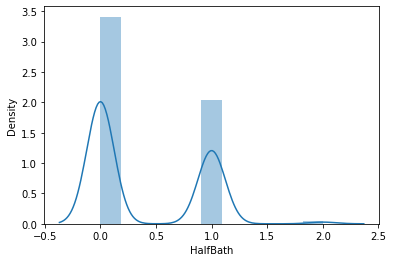

BedroomAbvGr
-0.2458028044433086
No skewness is present


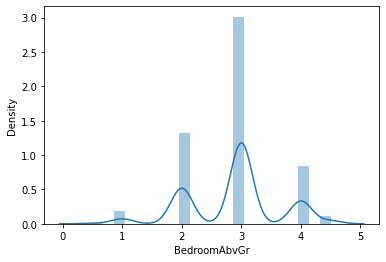

KitchenAbvGr
0
No skewness is present


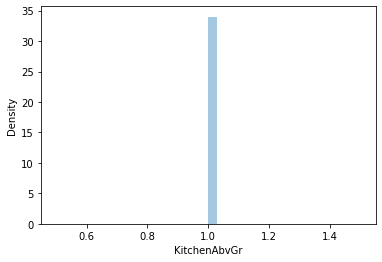

TotRmsAbvGrd
0.3738060728698237
No skewness is present


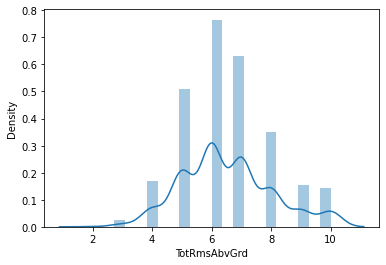

Fireplaces
0.5939499505277934
Column is having skewness


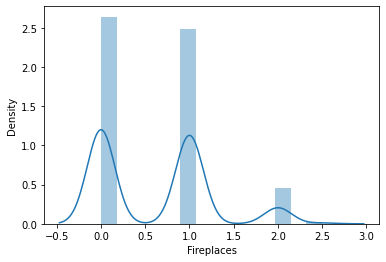

GarageYrBlt
-0.6723498963105243
Column is having skewness


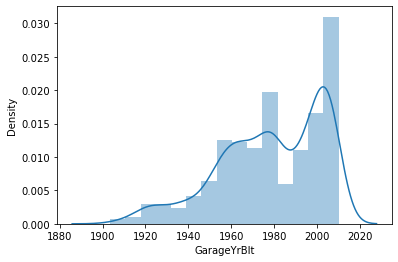

GarageCars
-0.4078213857943245
No skewness is present


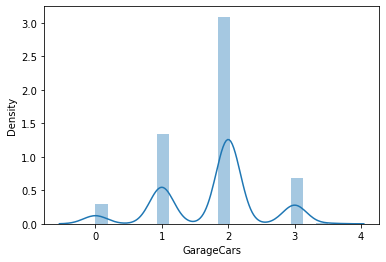

GarageArea
-0.1071659287742974
No skewness is present


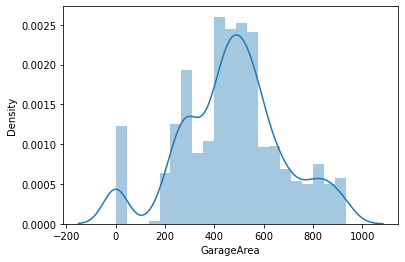

WoodDeckSF
1.0601475672970653
Column is having skewness


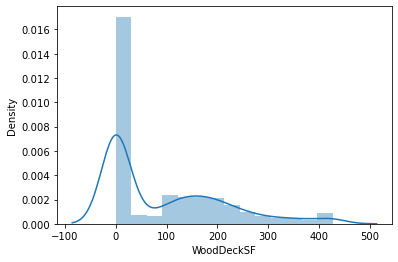

OpenPorchSF
1.1540304043467517
Column is having skewness


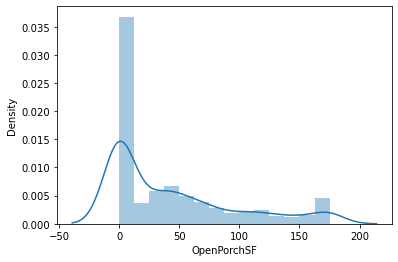

EnclosedPorch
0
No skewness is present


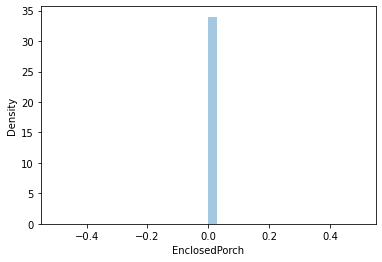

3SsnPorch
0
No skewness is present


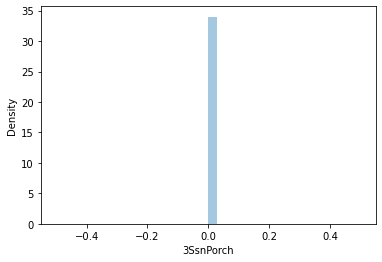

ScreenPorch
0
No skewness is present


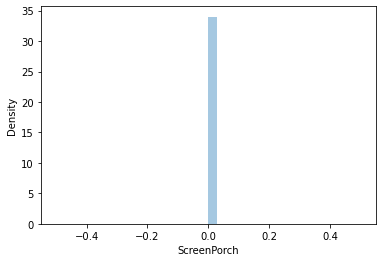

PoolArea
0
No skewness is present


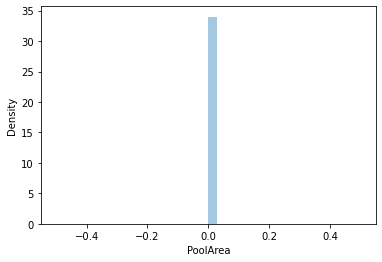

MiscVal
0
No skewness is present


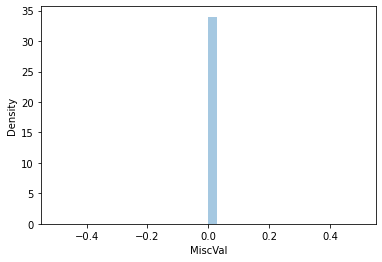

MoSold
0.22097863147453375
No skewness is present


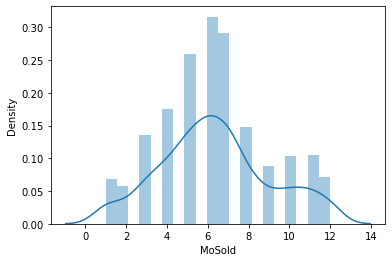

YrSold
0.1157647118679818
No skewness is present


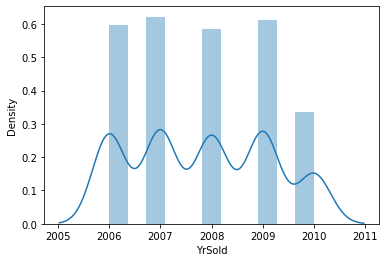

SalePrice
0.786601932697795
Column is having skewness


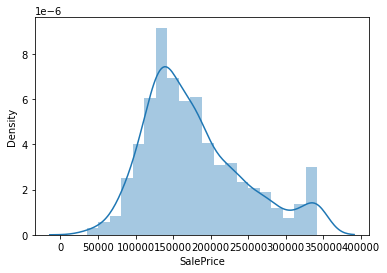

In [80]:
skewed_col = []
for col in num_col:
    print(col)
    print(data[col].skew())
    if (data[col].skew() > 0.55 or data[col].skew() < -0.55): 
        print("Column is having skewness")
        skewed_col.append(col)
        
    else:
        print("No skewness is present")
    
    plt.figure()
    sns.distplot(data[col])
    plt.show()

In [81]:
print("From the above graps we can check that we have skewness in the dataset.")
print("Below are the columns with skewness: \n")
for i in skewed_col:
    print(i)

From the above graps we can check that we have skewness in the dataset.
Below are the columns with skewness: 

MSSubClass
YearBuilt
MasVnrArea
BsmtFinSF1
BsmtUnfSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
HalfBath
Fireplaces
GarageYrBlt
WoodDeckSF
OpenPorchSF
SalePrice


We will use yean, johnson method to treat the skewness later. 

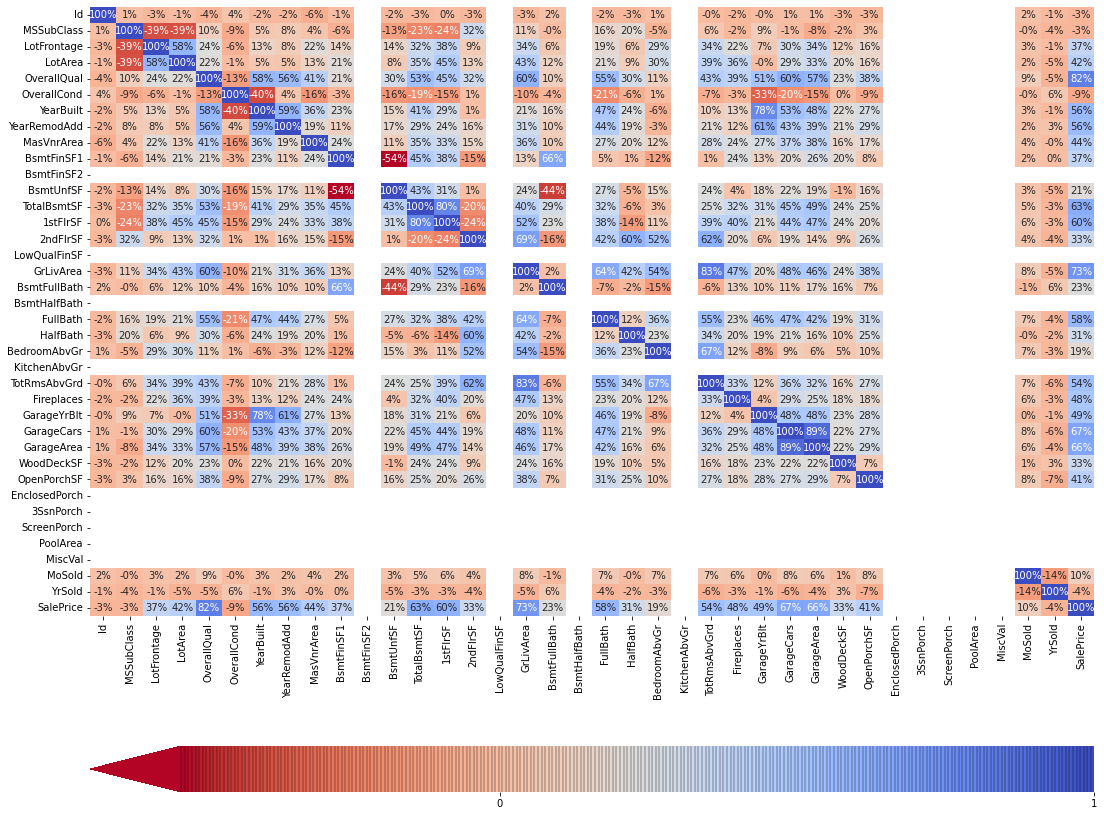

In [82]:
plt.figure(figsize=(18,16))
cbar_kws = {"orientation":"horizontal", 
            "shrink":1,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,22), 
            "drawedges":True,
           }
sns.heatmap(data.corr(),cmap ='coolwarm_r',fmt='.0%',annot =True,cbar_kws=cbar_kws)
plt.show()

We have constructed a heatmap from the dataset. We can see that our target variable SalePrice is Highly corelated with:-
1. OverallQual: Which Rates the overall material and finish of the house
2. YearBuilt: Original construction date
3. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
4. MasVnrArea: Masonry veneer area in square feet
5. BsmtFinSF1: Type 1 finished square feet
6. TotalBsmtSF: Total square feet of basement area
7. 1stFlrSF: First Floor square feet
8. GrLivArea: Above grade (ground) living area square feet
9. FullBath: Full bathrooms above grade
10. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
11. Fireplaces: Number of fireplaces
12. GarageYrBlt: Year garage was built
13. GarageCars: Size of garage in car capacity
14. GarageArea: Size of garage in square feet

Also, we can see that our target variable SalePrice is corelated with:-
1. LotFrontage: Linear feet of street connected to property
2. LotArea: Lot size in square feet
3. BsmtUnfSF: Unfinished square feet of basement area
4. 2ndFlrSF: Second floor square feet
5. BsmtFullBath: Basement full bathrooms
6. HalfBath: Half baths above grade
7. WoodDeckSF: Wood deck area in square feet
8. OpenPorchSF: Open porch area in square feet

Also, we can check that we have multicollinearity in the dataset. 

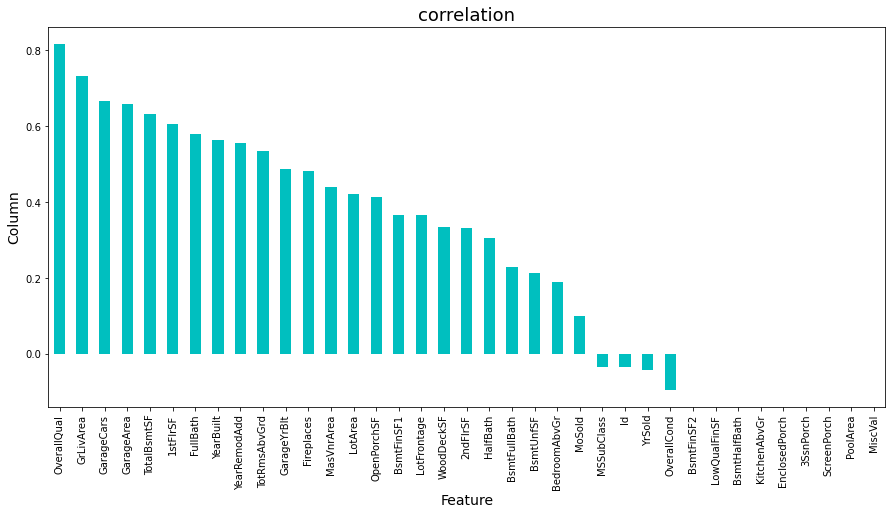

In [83]:
plt.figure(figsize=(15,7))
data.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Here, we can see the corelation of the salesprice with the columns. It highly related with the overqual and least corelated with teh 

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col1 = data.columns

In [90]:
for i in col1:
    if data[i].dtype == object:
        data[i] = le.fit_transform(data[i])

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Variables"] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
    return (vif)

In [92]:
pd.set_option("display.max.rows",None)
calc_vif(data)

,Variables,VIF Factor
0,Id,1.060009e+00
1,MSSubClass,6.393859e+00
2,MSZoning,1.615019e+00
3,LotFrontage,2.084445e+00
4,LotArea,2.550603e+00
5,Street,1.116139e+00
6,Alley,1.481294e+00
7,LotShape,1.294031e+00
8,LandContour,1.315090e+00
9,Utilities,NaN


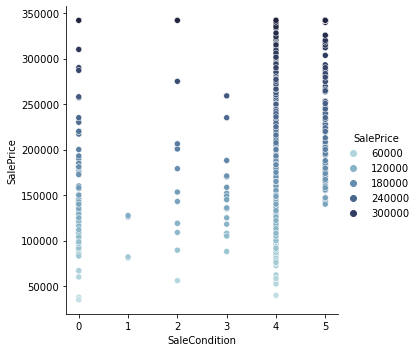

In [93]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="SaleCondition", y="SalePrice",
    hue="SalePrice", palette=cmap, sizes=(10, 200),
)

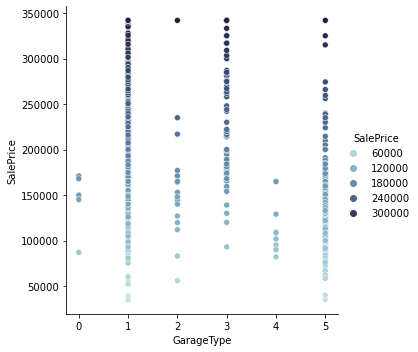

In [94]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="GarageType", y="SalePrice",
    hue="SalePrice", palette=cmap, sizes=(10, 200),
)

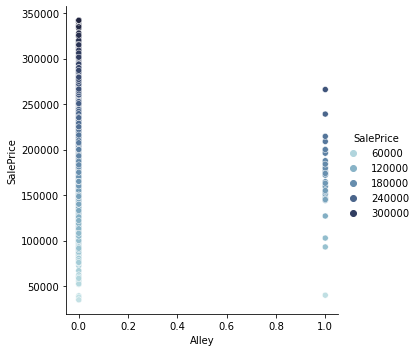

In [95]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="Alley", y="SalePrice",
    hue="SalePrice", palette=cmap, sizes=(10, 200),
)

<AxesSubplot:xlabel='Alley', ylabel='count'>

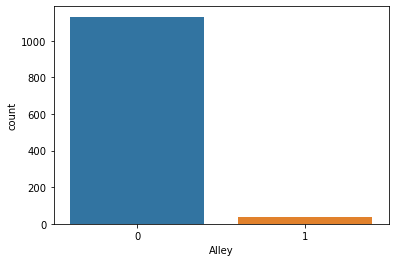

In [96]:
sns.countplot(data['Alley'])

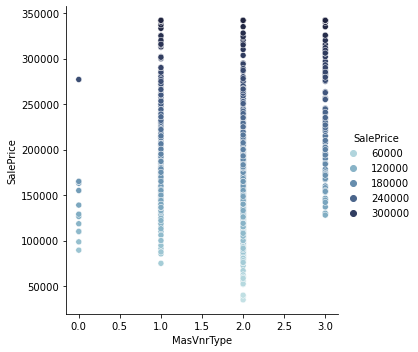

In [97]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="MasVnrType", y="SalePrice",
    hue="SalePrice", palette=cmap, sizes=(10, 200),
)

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

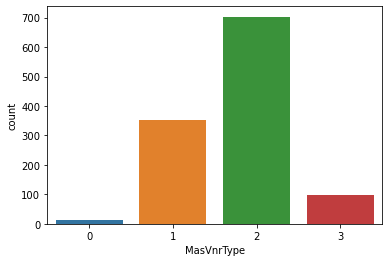

In [98]:
sns.countplot(data['MasVnrType'])

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

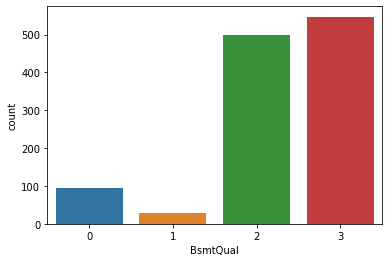

In [99]:
sns.countplot(data['BsmtQual'])

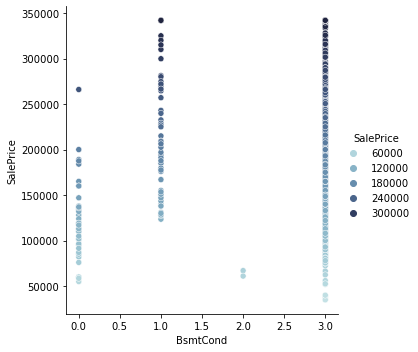

In [100]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="BsmtCond", y="SalePrice",
    hue="SalePrice", palette=cmap, sizes=(10, 200),
)

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

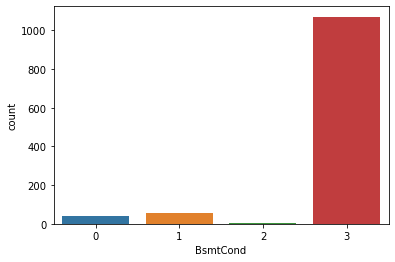

In [101]:
sns.countplot(data['BsmtCond'])

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

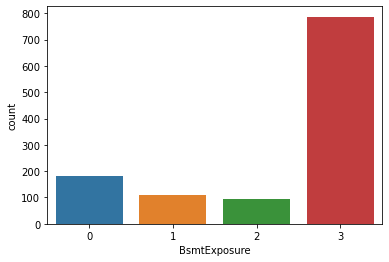

In [102]:
sns.countplot(data['BsmtExposure'])

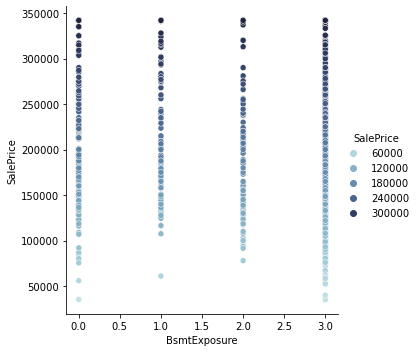

In [103]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="BsmtExposure", y="SalePrice",
    hue="SalePrice", palette=cmap, sizes=(10, 200),
)

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

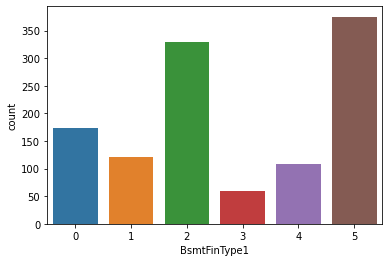

In [104]:
sns.countplot(data['BsmtFinType1'])

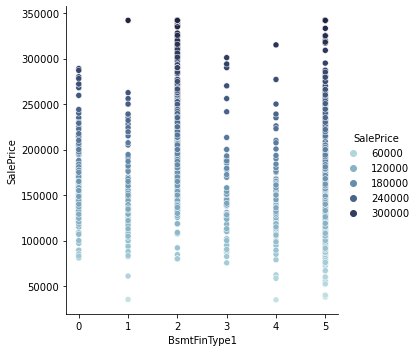

In [105]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="BsmtFinType1", y="SalePrice",
    hue="SalePrice", palette=cmap, sizes=(10, 200),
)

In [106]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127.0,120.0,3,70.0,4928.0,1,0,0,3,0,4,0,13,2,2,4,2,6.0,5.0,1976.0,1976.0,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120.0,5,0.0,958.0,1078.00,1,4,1,4,958.0,0.0,0.0,958.0,0.0,0.0,2.0,0.0,2.0,1.0,3,5.0,6,1.0,4,1,1977.0,1,2.0,440.0,4,4,2,0.0,175.0,0.0,0.0,0.0,0.0,2,2,2,0.0,2.0,2007.0,8,4,128000.0
1,889.0,20.0,3,95.0,15865.0,1,0,0,3,0,4,1,12,2,2,0,2,8.0,6.0,1970.0,1970.0,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351.0,4,0.0,1043.0,2030.25,1,0,1,4,2142.0,0.0,0.0,2217.0,1.0,0.0,2.0,0.0,4.0,1.0,2,8.0,6,1.0,4,1,1970.0,2,2.0,621.0,4,4,2,81.0,175.0,0.0,0.0,0.0,0.0,2,2,2,0.0,10.0,2007.0,8,4,268000.0
2,793.0,60.0,3,92.0,9920.0,1,0,0,3,0,1,0,15,2,2,0,5,7.0,5.0,1996.0,1997.0,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862.0,5,0.0,255.0,1117.00,1,0,1,4,1127.0,886.0,0.0,2013.0,1.0,0.0,2.0,1.0,3.0,1.0,3,8.0,6,1.0,4,1,1997.0,2,2.0,455.0,4,4,2,180.0,130.0,0.0,0.0,0.0,0.0,2,2,2,0.0,6.0,2007.0,8,4,269790.0
3,110.0,20.0,3,105.0,11751.0,1,0,0,3,0,4,0,14,2,2,0,2,6.0,6.0,1977.0,1977.0,3,1,8,9,1,400.0,3,4,1,2,3,3,1,705.0,5,0.0,1139.0,1844.00,1,0,1,4,1844.0,0.0,0.0,1844.0,0.0,0.0,2.0,0.0,3.0,1.0,3,7.0,6,1.0,4,1,1977.0,1,2.0,546.0,4,4,2,0.0,122.0,0.0,0.0,0.0,0.0,2,2,2,0.0,1.0,2010.0,0,4,190000.0
4,422.0,20.0,3,70.0,16635.0,1,0,0,3,0,2,0,14,2,2,0,2,6.0,7.0,1977.0,2000.0,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246.0,5,0.0,356.0,1602.00,1,2,1,4,1602.0,0.0,0.0,1602.0,0.0,0.0,2.0,0.0,3.0,1.0,2,8.0,6,1.0,4,1,1977.0,0,2.0,529.0,4,4,2,240.0,0.0,0.0,0.0,0.0,0.0,2,2,2,0.0,6.0,2009.0,8,4,215000.0
5,1197.0,60.0,3,58.0,14054.0,1,0,0,3,0,4,0,8,2,2,0,5,7.0,5.0,2006.0,2006.0,1,1,11,12,2,0.0,2,4,2,2,3,0,5,0.0,5,0.0,879.0,879.00,1,0,1,4,879.0,984.0,0.0,1863.0,0.0,0.0,2.0,1.0,4.0,1.0,2,9.0,6,1.0,2,3,2006.0,0,3.0,660.0,4,4,2,100.0,17.0,0.0,0.0,0.0,0.0,2,2,2,0.0,11.0,2006.0,6,5,219210.0
6,561.0,20.0,3,70.0,11341.0,1,0,0,3,0,4,0,19,2,2,0,2,5.0,6.0,1957.0,1996.0,3,1,12,13,1,180.0,3,4,1,2,3,3,0,1302.0,5,0.0,90.0,1392.00,1,4,1,4,1392.0,0.0,0.0,1392.0,1.0,0.0,1.0,1.0,3.0,1.0,3,5.0,4,1.0,2,5,1957.0,2,2.0,528.0,4,4,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,0.0,5.0,2010.0,8,4,121500.0
7,1041.0,20.0,3,88.0,13125.0,1,0,3,3,0,0,0,19,2,2,0,2,5.0,4.0,1957.0,2000.0,1,1,12,13,0,67.0,3,4,1,3,3,3,4,168.0,1,0.0,284.0,1134.00,1,0,1,4,1803.0,0.0,0.0,1803.0,1.0,0.0,2.0,0.0,3.0,1.0,3,8.0,0,1.0,4,1,1957.0,1,2.0,484.0,4,4,2,0.0,0.0,0.0,0.0,0.0,0.0,2,0,2,0.0,1.0,2006.0,8,4,155000.0
8,503.0,20.0,3,70.0,9170.0,1,0,3,3,0,0,0,7,1,2,0,2,5.0,7.0,1965.0,1965.0,3,1,7,7,2,0.0,3,4,1,3,3,3,0,698.0,2,0.0,420.0,1214.00,1,0,1,4,1214.0,0.0,0.0,1214.0,1.0,0.0,1.0,0.0,2.0,1.0,3,6.0,6,0.0,2,5,1965.0,2,2.0,461.0,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,2,0,2,0.0,4.0,2007.0,8,4,140000.0
9,576.0,50.0,3,80.0,8480.0,1,0,3,3,0,4,0,12,2,2,0,0,5.0,5.0,1947.0,1950.0,1,1,7,7,2,0.0,3,4,1,3,3,3,4,442.0,5,0.0,390.0,832.00,1,4,1,4,832.0,384.0,0.0,1216.0,0.0,0.0,1.0,0.0,2.0,1.0,3,6.0,6,0.0,2,5,1947.0,2,1.0,336.0,4,4,2,158.0,0.0,0.0,0.0,0.0,0.0,2,2,2,0.0,10.0,2008.0,0,0,118500.0


In [107]:
calc_vif(data)

,Variables,VIF Factor
0,Id,1.060009e+00
1,MSSubClass,6.393859e+00
2,MSZoning,1.615019e+00
3,LotFrontage,2.084445e+00
4,LotArea,2.550603e+00
5,Street,1.116139e+00
6,Alley,1.481294e+00
7,LotShape,1.294031e+00
8,LandContour,1.315090e+00
9,Utilities,NaN


In [108]:
data_new = data.copy()

In [109]:
data_new = data_new.drop('Id',axis=1)
data_new = data_new.drop('MiscVal',axis=1)
data_new = data_new.drop('PoolArea',axis=1)
data_new = data_new.drop('ScreenPorch',axis=1)
data_new = data_new.drop('3SsnPorch',axis=1)
data_new = data_new.drop('EnclosedPorch',axis=1)
data_new = data_new.drop('BsmtHalfBath',axis=1)
data_new = data_new.drop('LowQualFinSF',axis=1)
data_new = data_new.drop('BsmtFinSF2',axis=1)
data_new = data_new.drop('Utilities',axis=1)

In [110]:
data.shape

(1168, 81)

In [111]:
data_new.shape

(1168, 71)

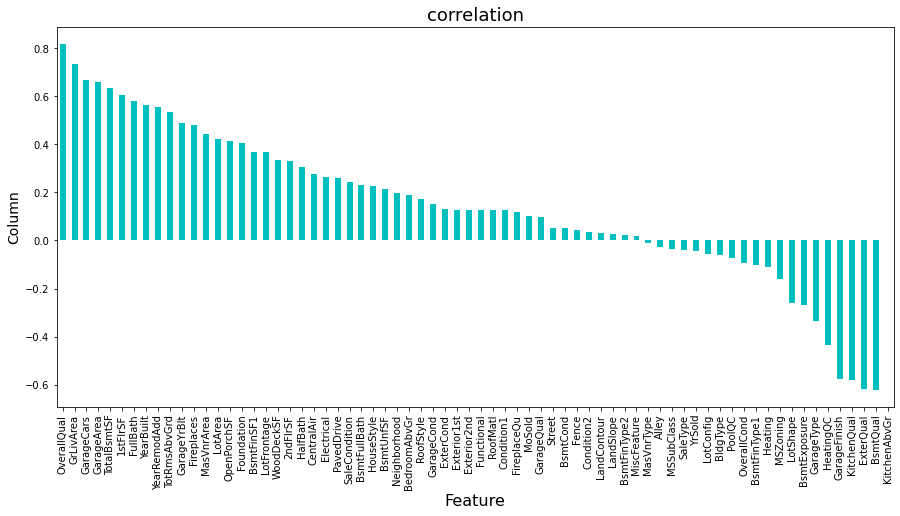

In [112]:
plt.figure(figsize=(15,7))
data_new.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=16)
plt.ylabel('Column',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [113]:
data.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice'])

OverallQual      0.817314
GrLivArea        0.733426
GarageCars       0.665892
GarageArea       0.658127
TotalBsmtSF      0.633270
1stFlrSF         0.604632
FullBath         0.579497
YearBuilt        0.562831
YearRemodAdd     0.555578
TotRmsAbvGrd     0.535698
GarageYrBlt      0.486574
Fireplaces       0.481273
MasVnrArea       0.440393
LotArea          0.421645
OpenPorchSF      0.412622
Foundation       0.405363
BsmtFinSF1       0.366287
LotFrontage      0.365568
WoodDeckSF       0.333797
2ndFlrSF         0.330649
HalfBath         0.305419
CentralAir       0.277923
Electrical       0.261978
PavedDrive       0.258902
SaleCondition    0.242058
BsmtFullBath     0.229634
HouseStyle       0.224277
BsmtUnfSF        0.213270
Neighborhood     0.198893
BedroomAbvGr     0.188599
RoofStyle        0.172867
GarageCond       0.150053
ExterCond        0.131824
Exterior1st      0.128017
Exterior2nd      0.127133
Functional       0.126902
RoofMatl         0.125381
Condition1       0.124829
FireplaceQu 

In [114]:
data_new.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice'])

OverallQual      0.817314
GrLivArea        0.733426
GarageCars       0.665892
GarageArea       0.658127
TotalBsmtSF      0.633270
1stFlrSF         0.604632
FullBath         0.579497
YearBuilt        0.562831
YearRemodAdd     0.555578
TotRmsAbvGrd     0.535698
GarageYrBlt      0.486574
Fireplaces       0.481273
MasVnrArea       0.440393
LotArea          0.421645
OpenPorchSF      0.412622
Foundation       0.405363
BsmtFinSF1       0.366287
LotFrontage      0.365568
WoodDeckSF       0.333797
2ndFlrSF         0.330649
HalfBath         0.305419
CentralAir       0.277923
Electrical       0.261978
PavedDrive       0.258902
SaleCondition    0.242058
BsmtFullBath     0.229634
HouseStyle       0.224277
BsmtUnfSF        0.213270
Neighborhood     0.198893
BedroomAbvGr     0.188599
RoofStyle        0.172867
GarageCond       0.150053
ExterCond        0.131824
Exterior1st      0.128017
Exterior2nd      0.127133
Functional       0.126902
RoofMatl         0.125381
Condition1       0.124829
FireplaceQu 

In [115]:
data.shape

(1168, 81)

In [116]:
data_new.shape

(1168, 71)

In [117]:
x = data_new.iloc[:,0:71]
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120.0,3,70.0,4928.0,1,0,0,3,4,0,13,2,2,4,2,6.0,5.0,1976.0,1976.0,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120.0,5,958.0,1078.00,1,4,1,4,958.0,0.0,958.0,0.0,2.0,0.0,2.0,1.0,3,5.0,6,1.0,4,1,1977.0,1,2.0,440.0,4,4,2,0.0,175.0,2,2,2,2.0,2007.0,8,4,128000.0
1,20.0,3,95.0,15865.0,1,0,0,3,4,1,12,2,2,0,2,8.0,6.0,1970.0,1970.0,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351.0,4,1043.0,2030.25,1,0,1,4,2142.0,0.0,2217.0,1.0,2.0,0.0,4.0,1.0,2,8.0,6,1.0,4,1,1970.0,2,2.0,621.0,4,4,2,81.0,175.0,2,2,2,10.0,2007.0,8,4,268000.0
2,60.0,3,92.0,9920.0,1,0,0,3,1,0,15,2,2,0,5,7.0,5.0,1996.0,1997.0,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862.0,5,255.0,1117.00,1,0,1,4,1127.0,886.0,2013.0,1.0,2.0,1.0,3.0,1.0,3,8.0,6,1.0,4,1,1997.0,2,2.0,455.0,4,4,2,180.0,130.0,2,2,2,6.0,2007.0,8,4,269790.0
3,20.0,3,105.0,11751.0,1,0,0,3,4,0,14,2,2,0,2,6.0,6.0,1977.0,1977.0,3,1,8,9,1,400.0,3,4,1,2,3,3,1,705.0,5,1139.0,1844.00,1,0,1,4,1844.0,0.0,1844.0,0.0,2.0,0.0,3.0,1.0,3,7.0,6,1.0,4,1,1977.0,1,2.0,546.0,4,4,2,0.0,122.0,2,2,2,1.0,2010.0,0,4,190000.0
4,20.0,3,70.0,16635.0,1,0,0,3,2,0,14,2,2,0,2,6.0,7.0,1977.0,2000.0,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246.0,5,356.0,1602.00,1,2,1,4,1602.0,0.0,1602.0,0.0,2.0,0.0,3.0,1.0,2,8.0,6,1.0,4,1,1977.0,0,2.0,529.0,4,4,2,240.0,0.0,2,2,2,6.0,2009.0,8,4,215000.0


In [118]:
y = data_new["SalePrice"]
y.head()

0    128000.0
1    268000.0
2    269790.0
3    190000.0
4    215000.0
Name: SalePrice, dtype: float64

In [119]:
x.skew()

MSSubClass        1.016094
MSZoning         -1.796785
LotFrontage       0.070310
LotArea           0.184194
Street          -17.021969
Alley             5.436187
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.214841
OverallCond       0.519895
YearBuilt        -0.562031
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        1.294984
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        0.742226
BsmtFinType2     -3.615783
BsmtUnfSF         0.789228
TotalBsmtSF       0.243671
Heating          10.103609
H

In [120]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
lr = LinearRegression()

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state = 45)

In [126]:
lr.fit(x_train,y_train)

LinearRegression()

In [127]:
prediction_lr = lr.predict(x_test)

In [128]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [129]:
print('Error Calculations: -')

print('Root mean square', np.sqrt(mean_squared_error(y_test,prediction_lr)))
print('Model Score',r2_score(y_test,prediction_lr)*100)

Error Calculations: -
Root mean square 12080.120323187966
Model Score 96.52030339773314


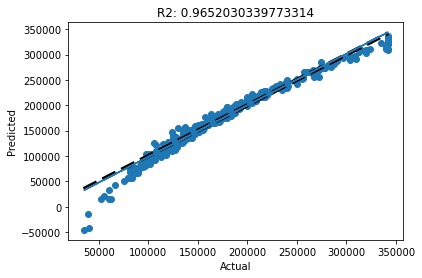

In [130]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction_lr)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, prediction_lr = y_test.values.reshape(-1,1), prediction_lr.reshape(-1,1)
ax.plot(y_test, lr.fit(y_test, prediction_lr).predict(y_test))
ax.set_title('R2: ' + str(r2_score(y_test, prediction_lr)))
plt.show()

In [131]:
from sklearn.tree import DecisionTreeRegressor

In [132]:
decision_tree = DecisionTreeRegressor()

In [133]:
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [134]:
predict_tree = decision_tree.predict(x_test)

In [135]:
print('Error Calculations: -')

print('Root mean square', np.sqrt(mean_squared_error(y_test,predict_tree)))
print('Model Score',r2_score(y_test,predict_tree)*100)

Error Calculations: -
Root mean square 3660.6375204648057
Model Score 99.68046950474591


AttributeError: 'numpy.ndarray' object has no attribute 'values'

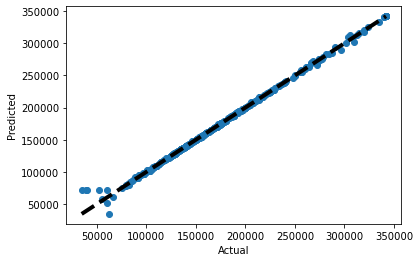

In [136]:
fig, ax = plt.subplots()
ax.scatter(y_test, predict_tree)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, predict_tree = y_test.values.reshape(-1,1), predict_tree.reshape(-1,1)
ax.plot(y_test, decision_tree.fit(y_test, predict_tree).predict(y_test))
ax.set_title('R2: ' + str(r2_score(y_test, predict_tree)))
plt.show()

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
rand_rf = RandomForestRegressor()

In [139]:
rand_rf.fit(x_train,y_train)

RandomForestRegressor()

In [140]:
rand_rf_predict = rand_rf.predict(x_test)

In [141]:
rand_rf.score(x_train,y_train)

0.9999450022651841

In [142]:
rand_rf.score(x_test,y_test)

0.9996159803669497

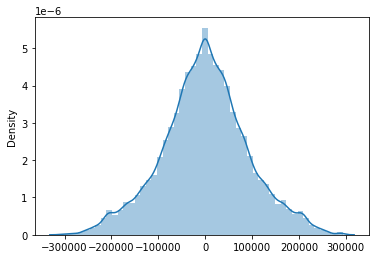

In [143]:
sns.distplot(y_test-rand_rf_predict)
plt.show()

In [144]:
print('Error Calculations: -')

print('Root mean square', np.sqrt(mean_squared_error(y_test,rand_rf_predict)))
print('Model Score',r2_score(y_test,rand_rf_predict)*100)

Error Calculations: -
Root mean square 1269.0457665602573
Model Score 99.96159803669497


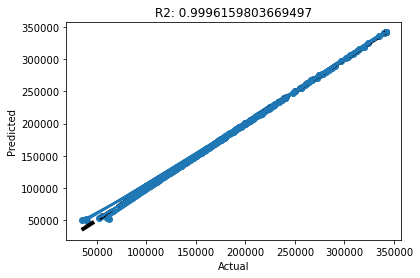

In [145]:
fig, ax = plt.subplots()
ax.scatter(y_test, rand_rf_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
y_test, rand_rf_predict = y_test.reshape(-1,1), rand_rf_predict.reshape(-1,1)
ax.plot(y_test, rand_rf.fit(y_test, rand_rf_predict).predict(y_test))
ax.set_title('R2: ' + str(r2_score(y_test, rand_rf_predict)))
plt.show()

In [146]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [147]:
predict_gb = gb.predict(x_test)

In [148]:
gb.score(x_train,y_train)

0.9999660492813978

In [149]:
gb.score(x_test,y_test)

0.9999066466631132

In [150]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,predict_gb))
print('Mean Squared Error:',mean_squared_error(y_test,predict_gb))
print('Root Mean Absolute Error:',np.sqrt(mean_absolute_error(y_test,predict_gb)))

Mean Absolute Error: 452.18013766165046
Mean Squared Error: 391499.29770501197
Root Mean Absolute Error: 21.264527684894638


AttributeError: 'numpy.ndarray' object has no attribute 'fit'

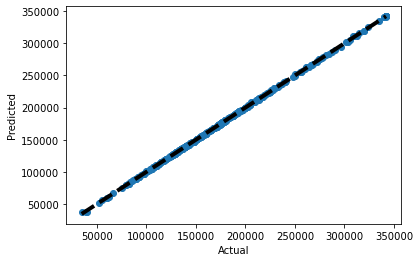

In [151]:
fig, ax = plt.subplots()
ax.scatter(y_test, predict_gb)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
y_test, predict_gb = y_test.reshape(-1,1), predict_gb.reshape(-1,1)
ax.plot(y_test, predict_gb.fit(y_test, predict_gb).predict(y_test))
ax.set_title('R2: ' + str(r2_score(y_test, predict_gb)))
plt.show()

In [152]:
from sklearn.model_selection import RandomizedSearchCV

In [153]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [154]:
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [155]:
gb_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [156]:
gb_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [157]:
gb=GradientBoostingRegressor(n_estimators=700,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=5,learning_rate=0.1)
gb.fit(x_train,y_train)
gb.score(x_train,y_train)
pred=gb.predict(x_test)
gbr=r2_score(y_test,pred)
print('R2 score:',gbr*100)

R2 score: 96.17935318696725


In [158]:
from sklearn.model_selection import cross_val_score
gbscore=cross_val_score(gb,x,y,cv=5)
gbc=gbscore.mean()
print('Cross Val Score:',gbc*100)

Cross Val Score: 96.55982977853427


In [159]:
import pickle
filename = 'housing_price_prediction.pkl'
pickle.dump(rand_rf, open(filename, 'wb'))

In [160]:
data_test = pd.read_csv('test.csv')

In [161]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [162]:
numerical_col = data_test.select_dtypes(include=[np.number])
numerical_col.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
0,337,20,86.0,14157,9,5,2005,2006,200.0,1249,0,673,1922,1922,0,0,1922,1,0,2,0,3,1,8,1,2005.0,3,676,178,51,0,0,0,0,NaN,0,7,2007
1,1018,120,NaN,5814,8,5,1984,1984,0.0,1036,0,184,1220,1360,0,0,1360,1,0,1,0,1,1,4,1,1984.0,2,565,63,0,0,0,0,0,NaN,0,8,2009
2,929,20,NaN,11838,8,5,2001,2001,0.0,0,0,1753,1753,1788,0,0,1788,0,0,2,0,3,1,7,1,2001.0,2,522,202,151,0,0,0,0,NaN,0,6,2009
3,1148,70,75.0,12000,7,7,1941,1950,0.0,275,0,429,704,860,704,0,1564,0,0,1,1,3,1,7,1,1941.0,1,234,0,0,0,0,0,0,NaN,0,7,2009
4,1227,60,86.0,14598,6,5,2007,2007,74.0,0,0,894,894,894,1039,0,1933,0,0,2,1,4,1,9,1,2007.0,3,668,100,18,0,0,0,0,NaN,0,1,2008


In [163]:
cat_col = data_test.select_dtypes(include='object')
cat_col.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Ex,Attchd,RFn,TA,TA,Y,NaN,NaN,COD,Abnorml
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
3,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,Fa,Typ,Gd,Attchd,Unf,TA,TA,Y,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Mn,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,WD,Normal


In [164]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [165]:
print("Test Data Shape Is:-",data_test.shape)
print("numbers of Rows are:-",data_test.shape[0])
print("numbers of Columns are:-",data_test.shape[1])

Test Data Shape Is:- (292, 80)
numbers of Rows are:- 292
numbers of Columns are:- 80


In [166]:
col2 = data_test.columns
col2

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [167]:
obj_col = []
num_col = []
print("Checking Null Values in the dataset:-")
for i in col2:
    if data_test[i].isnull().sum() > 0:
        print("The colum",i,"is having null values. Total null values are:-",data_test[i].isnull().sum())
        print("The datatype of",i,"with null values is:-",data_test[i].dtypes)
        if data_test[i].dtype == 'object':
            obj_col.append(i)
        else:
            num_col.append(i)

print("\n")
print("Total Null values are",data_test.isnull().sum().sum())

Checking Null Values in the dataset:-
The colum LotFrontage is having null values. Total null values are:- 45
The datatype of LotFrontage with null values is:- float64
The colum Alley is having null values. Total null values are:- 278
The datatype of Alley with null values is:- object
The colum MasVnrType is having null values. Total null values are:- 1
The datatype of MasVnrType with null values is:- object
The colum MasVnrArea is having null values. Total null values are:- 1
The datatype of MasVnrArea with null values is:- float64
The colum BsmtQual is having null values. Total null values are:- 7
The datatype of BsmtQual with null values is:- object
The colum BsmtCond is having null values. Total null values are:- 7
The datatype of BsmtCond with null values is:- object
The colum BsmtExposure is having null values. Total null values are:- 7
The datatype of BsmtExposure with null values is:- object
The colum BsmtFinType1 is having null values. Total null values are:- 7
The datatype of

In [168]:
print(obj_col)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature']


In [169]:
print(num_col)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'PoolQC']


In [170]:
data_test["LotFrontage"].skew()

0.42974380624133895

MasVnrArea is skewed
MasVnrArea skewness 1.9734507929252854


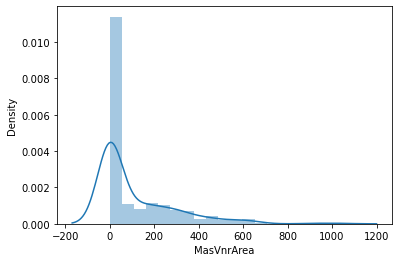

In [171]:
for i in num_col:
    if data_test[i].skew() > 0.55:
        print(i,"is skewed")
        print(i,"skewness",data_test[i].skew())
        sns.distplot(data_test[i])
    else:
        pass

In [172]:
data_test["MasVnrArea"] = data_test["MasVnrArea"].fillna(data_test["MasVnrArea"].median())

In [173]:
data_test["LotFrontage"] = data_test["LotFrontage"].fillna(data_test["LotFrontage"].mean())
data_test["GarageYrBlt"] = data_test["GarageYrBlt"].fillna(data_test["GarageYrBlt"].mean())

In [174]:
for i in num_col:
    if data_test[i].isnull().sum() == 0:
        print("Null values removed")
    else:
        print("null values are still there in",i)

Null values removed
Null values removed
Null values removed
null values are still there in PoolQC


Pool Qc columns is empty hence will drop the same

In [175]:
print(obj_col)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature']


In [176]:
for i in obj_col:
    if data_test[i].isnull().sum() > 0:
        data_test[i] = data_test[i].fillna(data_test[i].mode()[0])

In [177]:
for i in obj_col:
    if data_test[i].isnull().sum() == 0:
        print("Null values removed")
    else:
        print("null values are still there in",i)

Null values removed
Null values removed
Null values removed
Null values removed
Null values removed
Null values removed
Null values removed
Null values removed
Null values removed
Null values removed
Null values removed
Null values removed
Null values removed
Null values removed
Null values removed


All the null Values are sucessfully removed from the columns. 

In [178]:
wine

NameError: name 'wine' is not defined

In [179]:
data_test.shape

(292, 80)

In [180]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.000000,14157,Pave,Grvl,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,MnPrv,Shed,0,7,2007,WD,Normal
1,1018,120,RL,66.425101,5814,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,MnPrv,Shed,0,8,2009,COD,Abnorml
2,929,20,RL,66.425101,11838,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,MnPrv,Shed,0,6,2009,WD,Normal
3,1148,70,RL,75.000000,12000,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,Shed,0,7,2009,WD,Normal
4,1227,60,RL,86.000000,14598,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,MnPrv,Shed,0,1,2008,WD,Normal


In [181]:
numerical_col["PoolArea"].value_counts()

0    292
Name: PoolArea, dtype: int64

In [182]:
numerical_col["PoolQC"].value_counts()

Series([], Name: PoolQC, dtype: int64)

In [183]:
data_test.skew()

Id               -0.108806
MSSubClass        1.358597
LotFrontage       0.466813
LotArea          12.781805
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        1.978463
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
1stFlrSF          0.692047
2ndFlrSF          0.765511
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.540164
GarageYrBlt      -0.683042
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
PoolQC                 NaN
MiscVal          13.264758
MoSold            0.186504
Y

In [184]:
data_test2 = data_test.copy()

In [185]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [186]:
for i in data_test.columns:
    if data_test[i].dtype == 'object':
        data_test[i] = label.fit_transform(data_test[i])

In [187]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2,86.000000,14157,1,0,0,1,0,0,0,21,2,0,0,2,9,5,2005,2006,3,0,9,11,3,200.0,2,3,2,0,2,1,2,1249,5,0,673,1922,0,0,1,3,1922,0,0,1922,1,0,2,0,3,1,2,8,5,1,2,1,2005.0,0,3,676,4,4,2,178,51,0,0,0,0,NaN,2,1,0,7,2007,5,2
1,1018,120,2,66.425101,5814,1,0,0,3,0,1,0,21,2,0,4,2,8,5,1984,1984,1,0,5,5,2,0.0,2,3,1,2,2,0,2,1036,5,0,184,1220,0,2,1,3,1360,0,0,1360,1,0,1,0,1,1,2,4,5,1,0,1,1984.0,1,2,565,4,4,2,63,0,0,0,0,0,NaN,2,1,0,8,2009,0,0
2,929,20,2,66.425101,11838,1,0,3,3,0,4,0,4,2,0,0,2,8,5,2001,2001,3,0,9,11,2,0.0,2,3,2,2,2,0,5,0,5,0,1753,1753,0,0,1,3,1788,0,0,1788,0,0,2,0,3,1,0,7,5,1,4,1,2001.0,1,2,522,4,4,2,202,151,0,0,0,0,NaN,2,1,0,6,2009,5,2
3,1148,70,2,75.000000,12000,1,0,3,0,0,4,0,5,2,0,0,5,7,7,1941,1950,1,0,6,7,2,0.0,3,3,1,3,2,3,4,275,5,0,429,704,0,0,1,3,860,704,0,1564,0,0,1,1,3,1,1,7,5,1,2,1,1941.0,2,1,234,4,4,2,0,0,0,0,0,0,NaN,2,1,0,7,2009,5,2
4,1227,60,2,86.000000,14598,1,0,0,3,0,1,0,20,1,0,0,5,6,5,2007,2007,1,0,9,11,3,74.0,2,3,2,2,2,2,5,0,5,0,894,894,0,0,1,3,894,1039,0,1933,0,0,2,1,4,1,2,9,5,1,2,3,2007.0,0,3,668,4,4,2,100,18,0,0,0,0,NaN,2,1,0,1,2008,5,2


In [188]:
data_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [189]:
data_test = data_test.drop('PoolQC',axis=1)

In [190]:
data_test.shape

(292, 79)

In [191]:
x.shape

(1168, 71)

In [192]:
data_test = data_test.drop('MiscVal',axis=1)
data_test = data_test.drop('PoolArea',axis=1)
data_test = data_test.drop('ScreenPorch',axis=1)
data_test = data_test.drop('3SsnPorch',axis=1)
data_test = data_test.drop('EnclosedPorch',axis=1)
data_test = data_test.drop('BsmtHalfBath',axis=1)
data_test = data_test.drop('LowQualFinSF',axis=1)
data_test = data_test.drop('BsmtFinSF2',axis=1)
#data_test = data_test.drop('Utilities',axis=1)

In [193]:
data_test = sc.fit_transform(data_test)

In [194]:
data_test.shape

(292, 71)

In [195]:
x.shape

(1168, 71)

In [196]:
import pickle
load_model = pickle.load(open('housing_price_prediction.pkl','rb'))

In [197]:
load_model

RandomForestRegressor()

In [198]:
result = load_model.predict(data_test)

ValueError: X has 71 features, but DecisionTreeRegressor is expecting 1 features as input.